# PROYECTO PARAGUAS GRUPO 4

## MODEL SIMULATION WITH ML ON CROP PERFORMANCE IN SPAIN

The aim of this project is to carry out simulation models of crop yields depending on precipitation in Spain's autonomous communities, looking for a greater profitability, productivity and use of available resources.

# EXPLORATORY ANALYSIS

The exploratory analysis contains the following items:

1. Initial database analysis.
2. Visualization of the features.
3. Correlation between features.
4. Conclusions.

These are the features contained in the database:

- Comunidad_Autonoma: Spain's 8 autonomous communities (Galicia and Pais Vasco from the north area, Cataluña and Comunidad Valenciana from the east area, Madrid and Castilla y Leon from the central area and Extremadura and Andalucia from the south area).
- Año: years from 2012 to 2019.
- Precipitacion_Mes: there are 12 features of this type (each one referring to the mean precipitation registered in l/m2 in the entire region each month of the year).
- Precipitacion_Anual: mean precipitation registered in l/m2 in the region throughout all the year.
- Rendimiento_Trigo: wheat production in kg per hectare of land in each of the regions per year.
- Rendimiento_Patata: potato production in kg per hectare of land in each of the regions per year.
- Rendimiento_Maiz: corn production in kg per hectare of land in each of the regions per year.
- Rendimiento_Garbanzo: chickpea production in kg per hectare of land in each of the regions per year.

(We have created a database for 17 autonomous communities in Spain, but we will work with 8 of them to facilitate calculations and data visualisation.)

The preliminary hypotheses considered in tackling the problem are detailed below:

- Galicia and País Vasco are the autonomous communities with the highest levels of precipitation.
- Wheat yields are less affected by rainfall than other crops.
- Cataluña and Andalucia have very little correlation with respect to the level of precipitation. However, Madrid and Extremadura have a high correlation.

In [130]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [131]:
pd.DataFrame()
#Read csv file
datosCrop = pd.read_excel('DataCropSpainTemperatura.xlsx')
datos=datosCrop.loc[:, ~datosCrop.columns.str.contains('^Unnamed')]

## 1. INITIAL DATABASE ANALYSIS

## ATRIBUTTES

In [132]:
#List the types of all columns
datos.dtypes

Comunidad_Autonoma           object
Año                         float64
Precipitacion_Enero         float64
Precipitacion_Febrero       float64
Precipitacion_Marzo         float64
Precipitacion_Abril         float64
Precipitacion_Mayo          float64
Precipitacion_Junio         float64
Precipitacion_Julio         float64
Precipitacion_Agosto        float64
Precipitacion_Septiembre    float64
Precipitacion_Octubre       float64
Precipitacion_Noviembre     float64
Precipitacion_Diciembre     float64
Precipitacion_Anual         float64
RendimientoTrigo            float64
RendimientoPatata           float64
RendimientoMaiz             float64
RendimientoGarbanzo         float64
TempMax                     float64
TempMin                     float64
MediaTemperatura            float64
DiasTempMenor0              float64
dtype: object

In [133]:
#Total number of elements in the Data Frame
datos.size

2852

## METHODS

In [134]:
#Display a few first records
pd.set_option('display.max_columns',None)
datos.head()

,Comunidad_Autonoma,Año,Precipitacion_Enero,Precipitacion_Febrero,Precipitacion_Marzo,Precipitacion_Abril,Precipitacion_Mayo,Precipitacion_Junio,Precipitacion_Julio,Precipitacion_Agosto,Precipitacion_Septiembre,Precipitacion_Octubre,Precipitacion_Noviembre,Precipitacion_Diciembre,Precipitacion_Anual,RendimientoTrigo,RendimientoPatata,RendimientoMaiz,RendimientoGarbanzo,TempMax,TempMin,MediaTemperatura,DiasTempMenor0
0,Andalucia,2012.0,19.000,3.000,15.000,43.00,29.00,0.000,0.000,0.00,65.000000,91.000,143.000,20.000,422.000,2324.0,12750.0,7530.0,954.0,42.8,-3.2,18.1,17.0
1,Andalucia,2013.0,44.000,64.000,160.000,42.00,17.00,1.000,1.000,14.00,16.000000,32.000,8.000,54.000,445.000,3434.0,32395.0,6629.0,1436.0,39.9,-0.1,17.9,11.0
2,Andalucia,2014.0,62.375,57.875,28.875,39.75,11.25,9.375,0.125,0.00,48.125000,62.875,126.375,19.250,465.875,3761.0,20740.0,8782.0,1261.0,40.2,0.0,18.6,6.0
3,Andalucia,2015.0,44.000,23.000,44.000,41.00,2.00,3.000,1.000,2.00,21.000000,73.000,36.000,13.000,302.000,3426.0,20531.0,9879.0,1137.0,41.8,0.0,18.9,9.0
4,Andalucia,2016.0,38.000,31.875,23.125,57.00,94.50,1.000,1.000,1.75,5.142857,64.375,95.125,86.125,496.000,2398.0,21673.0,8422.0,1771.0,42.3,0.0,18.7,7.0


In [135]:
#Output basic statistics for the numeric columns
datos.describe()

,Año,Precipitacion_Enero,Precipitacion_Febrero,Precipitacion_Marzo,Precipitacion_Abril,Precipitacion_Mayo,Precipitacion_Junio,Precipitacion_Julio,Precipitacion_Agosto,Precipitacion_Septiembre,Precipitacion_Octubre,Precipitacion_Noviembre,Precipitacion_Diciembre,Precipitacion_Anual,RendimientoTrigo,RendimientoPatata,RendimientoMaiz,RendimientoGarbanzo,TempMax,TempMin,MediaTemperatura,DiasTempMenor0
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2015.500000,69.925347,60.312283,68.708767,62.208550,38.924913,26.610677,18.764974,20.467169,39.288039,66.384332,90.342665,51.81901,611.552517,3633.937500,29008.281250,8622.531250,1029.968750,38.551562,-2.550000,15.973437,20.250000
std,2.309401,77.974805,70.721643,63.698426,40.414883,32.155216,28.585823,20.563936,21.344567,30.269171,44.738619,74.213682,55.74886,369.561785,1117.348276,9519.430206,2995.380766,338.746661,2.407132,2.546457,2.209952,20.804456
min,2012.000000,2.000000,0.000000,2.000000,6.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.00000,243.000000,1509.000000,12750.000000,3668.000000,414.000000,34.600000,-8.700000,11.400000,0.000000
25%,2013.750000,19.000000,10.000000,20.812500,35.833333,14.250000,4.750000,2.375000,2.000000,18.000000,31.916667,42.125000,14.00000,343.187500,2721.750000,20490.500000,6237.750000,872.250000,36.775000,-3.450000,14.225000,7.750000
50%,2015.500000,39.000000,41.750000,43.250000,57.000000,29.000000,16.333333,12.500000,13.875000,33.500000,57.000000,75.000000,30.00000,471.000000,3517.000000,28374.000000,8150.500000,970.000000,37.950000,-2.450000,16.600000,15.500000
75%,2017.250000,79.541667,70.062500,101.250000,82.250000,55.500000,40.333333,28.666667,34.000000,56.750000,85.000000,113.812500,68.00000,671.812500,4326.750000,35084.750000,11212.500000,1215.250000,40.225000,-1.175000,17.900000,23.000000
max,2019.000000,305.000000,290.333333,266.250000,177.000000,155.000000,130.000000,88.666667,94.000000,154.250000,187.000000,368.333333,235.00000,1636.000000,6450.000000,54177.000000,14491.000000,1771.000000,44.300000,2.400000,19.200000,87.000000


In [136]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comunidad_Autonoma        64 non-null     object 
 1   Año                       64 non-null     float64
 2   Precipitacion_Enero       64 non-null     float64
 3   Precipitacion_Febrero     64 non-null     float64
 4   Precipitacion_Marzo       64 non-null     float64
 5   Precipitacion_Abril       64 non-null     float64
 6   Precipitacion_Mayo        64 non-null     float64
 7   Precipitacion_Junio       64 non-null     float64
 8   Precipitacion_Julio       64 non-null     float64
 9   Precipitacion_Agosto      64 non-null     float64
 10  Precipitacion_Septiembre  64 non-null     float64
 11  Precipitacion_Octubre     64 non-null     float64
 12  Precipitacion_Noviembre   64 non-null     float64
 13  Precipitacion_Diciembre   64 non-null     float64
 14  Precipitac

None of the columns contain any missing values.

Precipitation is an environmental factor whose value can range from 0 to an unpredictable maximum due to punctual meteorological phenomenon such as storms, floods, etc. On the other hand, as the information in the database was entered by hand by us, we tried to make sure that both the values related to rainfall and crop yields were coherent. That said, we did not consider the existence of outliers.

## 2. VISUALIZATION OF THE FEATURES

Let's explore the data by visualizing the distribution of values in some columns of the dataset.

To facilitate a series of operations, a dataframe will be created for each autonomous community.

In [137]:
#New dataframes
datosAndalucia=datos[datos['Comunidad_Autonoma']=='Andalucia']
datosCastillaYLeon=datos[datos['Comunidad_Autonoma']=='Castilla y Leon']
datosCataluña=datos[datos['Comunidad_Autonoma']=='Cataluña']
datosComunidadValenciana=datos[datos['Comunidad_Autonoma']=='Comunidad Valenciana']
datosExtremadura=datos[datos['Comunidad_Autonoma']=='Extremadura']
datosGalicia=datos[datos['Comunidad_Autonoma']=='Galicia']
datosMadrid=datos[datos['Comunidad_Autonoma']=='Madrid']
datosPaisVasco=datos[datos['Comunidad_Autonoma']=='Pais Vasco']

It is interesting to note that two autonomous communities have been selected per zone (north, south, east, centre).

Text(0.5, 1.0, 'Precipitacion por año Comunidades Autonomas')

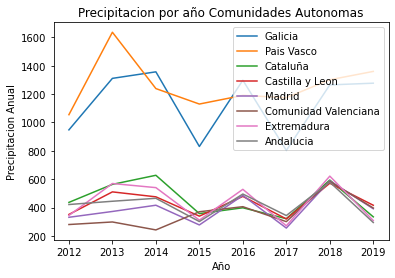

In [138]:
plt.plot(datosGalicia['Año'], datosGalicia['Precipitacion_Anual'])
plt.plot(datosPaisVasco['Año'], datosPaisVasco['Precipitacion_Anual'])
plt.plot(datosCataluña['Año'], datosCataluña['Precipitacion_Anual'])
plt.plot(datosCastillaYLeon['Año'], datosCastillaYLeon['Precipitacion_Anual'])
plt.plot(datosMadrid['Año'], datosMadrid['Precipitacion_Anual'])
plt.plot(datosComunidadValenciana['Año'], datosComunidadValenciana['Precipitacion_Anual'])
plt.plot(datosExtremadura['Año'], datosExtremadura['Precipitacion_Anual'])
plt.plot(datosAndalucia['Año'], datosAndalucia['Precipitacion_Anual'])
plt.xlabel('Año')
plt.ylabel('Precipitacion Anual')
plt.legend(['Galicia', 'Pais Vasco', 'Cataluña', 'Castilla y Leon', 'Madrid', 'Comunidad Valenciana', 'Extremadura', 'Andalucia']);
plt.title("Precipitacion por año Comunidades Autonomas")

The following conclusions can be drawn from these graphs:
- First of all, on one hand, it can be seen that Galicia and Pais Vasco are the rainiest regions. Based on this fact, it can be seen that the northern regions have the highest precipitation levels. On the other hand, Comunidad Valenciana is the least rainy region.
- Secondly, the graphs show that the years 2013 and 2018 were the rainiest ones.

In [139]:
datosPrecipitacionMeses=datos.loc[0:63,['Precipitacion_Enero', 'Precipitacion_Febrero', 'Precipitacion_Marzo', 'Precipitacion_Abril', 'Precipitacion_Mayo', 'Precipitacion_Junio', 'Precipitacion_Julio', 'Precipitacion_Agosto', 'Precipitacion_Septiembre', 'Precipitacion_Octubre', 'Precipitacion_Noviembre', 'Precipitacion_Diciembre']]
datosPrecipitacionMeses

,Precipitacion_Enero,Precipitacion_Febrero,Precipitacion_Marzo,Precipitacion_Abril,Precipitacion_Mayo,Precipitacion_Junio,Precipitacion_Julio,Precipitacion_Agosto,Precipitacion_Septiembre,Precipitacion_Octubre,Precipitacion_Noviembre,Precipitacion_Diciembre
0,19.000000,3.000000,15.000000,43.000000,29.000000,0.000000,0.000000,0.000000,65.000000,91.000000,143.000000,20.000000
1,44.000000,64.000000,160.000000,42.000000,17.000000,1.000000,1.000000,14.000000,16.000000,32.000000,8.000000,54.000000
2,62.375000,57.875000,28.875000,39.750000,11.250000,9.375000,0.125000,0.000000,48.125000,62.875000,126.375000,19.250000
3,44.000000,23.000000,44.000000,41.000000,2.000000,3.000000,1.000000,2.000000,21.000000,73.000000,36.000000,13.000000
4,38.000000,31.875000,23.125000,57.000000,94.500000,1.000000,1.000000,1.750000,5.142857,64.375000,95.125000,86.125000
...,...,...,...,...,...,...,...,...,...,...,...,...
59,202.000000,266.000000,135.000000,58.000000,45.000000,53.000000,40.000000,94.000000,42.000000,60.000000,123.000000,13.000000
60,114.333333,290.333333,185.666667,57.333333,59.000000,53.666667,54.000000,26.000000,79.000000,46.000000,199.666667,26.000000
61,143.000000,83.000000,100.000000,50.333333,67.666667,95.333333,39.333333,73.000000,89.000000,45.000000,185.333333,204.333333
62,237.333333,211.666667,105.333333,158.666667,84.666667,68.000000,85.333333,35.333333,25.333333,146.666667,96.333333,46.666667


array([[<AxesSubplot:title={'center':'Precipitacion_Enero'}>,
        <AxesSubplot:title={'center':'Precipitacion_Febrero'}>,
        <AxesSubplot:title={'center':'Precipitacion_Marzo'}>],
       [<AxesSubplot:title={'center':'Precipitacion_Abril'}>,
        <AxesSubplot:title={'center':'Precipitacion_Mayo'}>,
        <AxesSubplot:title={'center':'Precipitacion_Junio'}>],
       [<AxesSubplot:title={'center':'Precipitacion_Julio'}>,
        <AxesSubplot:title={'center':'Precipitacion_Agosto'}>,
        <AxesSubplot:title={'center':'Precipitacion_Septiembre'}>],
       [<AxesSubplot:title={'center':'Precipitacion_Octubre'}>,
        <AxesSubplot:title={'center':'Precipitacion_Noviembre'}>,
        <AxesSubplot:title={'center':'Precipitacion_Diciembre'}>]],
      dtype=object)

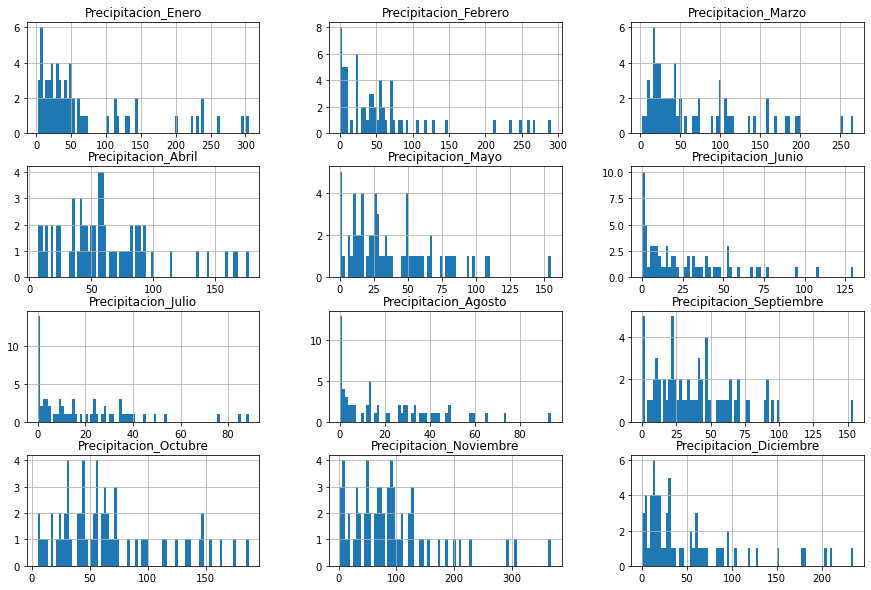

In [140]:
datosPrecipitacionMeses.hist(bins=80, figsize=(15,10))

As it can be seen in the graph above, January, February, March and November are the wettest months, while July and August are the driest.

Once the analysis of rainfall has been carried out, the next step is to proceed to study the yield of the different crops by region. First of all, the wheat yield will be studied.

<AxesSubplot:xlabel='Año', ylabel='RendimientoTrigo'>

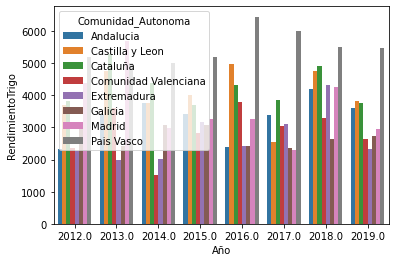

In [141]:
# Wheat yield
sns.barplot(x=datos['Año'], y='RendimientoTrigo', hue='Comunidad_Autonoma', data=datos)

The above graph does not show this information very well, so a graph by autonomous community will be made to be able to compare the values in a better way.

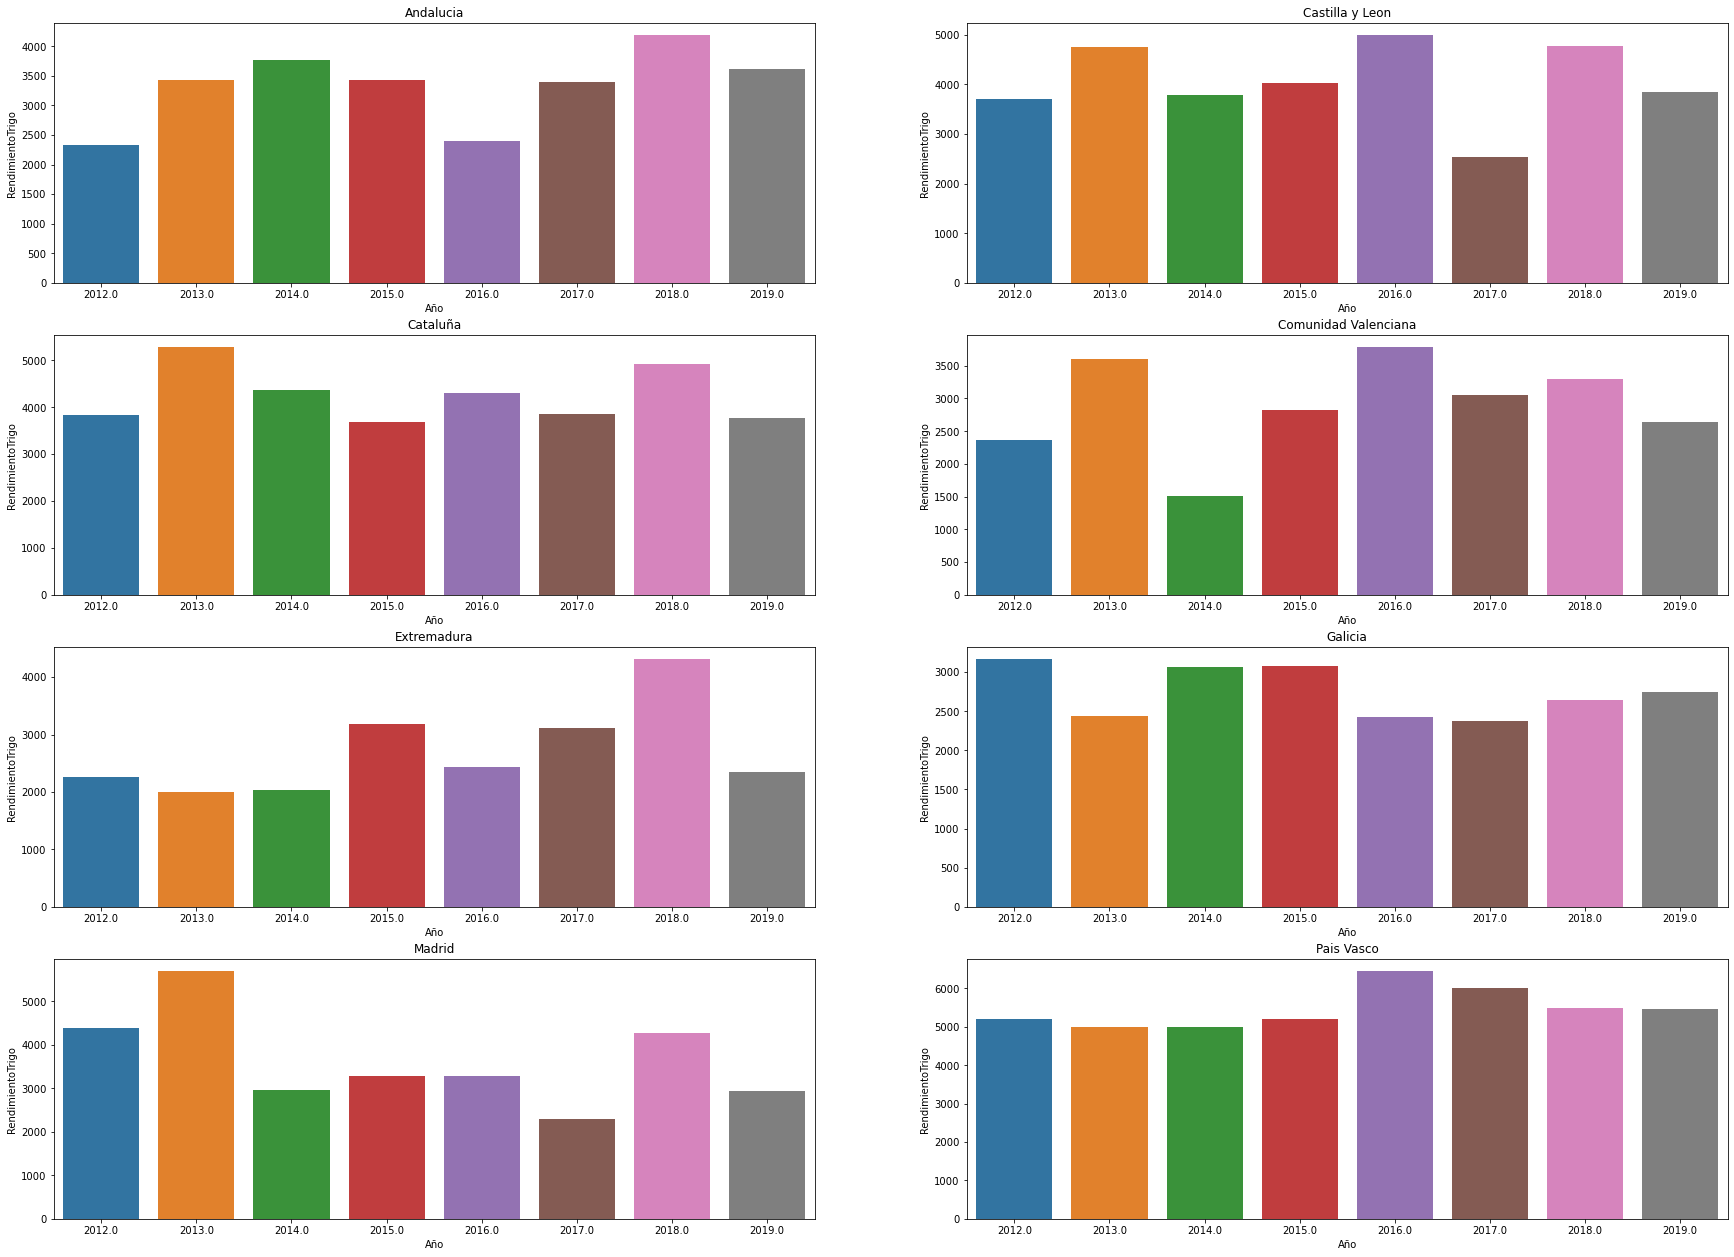

In [142]:
fig, axes = plt.subplots(4, 2, figsize=(30, 22))
axes[0,0].set_title('Andalucia')
sns.barplot(x=datos['Año'], y='RendimientoTrigo', data=datosAndalucia, ax=axes[0,0])
axes[0,1].set_title('Castilla y Leon')
sns.barplot(x=datos['Año'], y='RendimientoTrigo', data=datosCastillaYLeon, ax=axes[0,1])
axes[1,0].set_title('Cataluña')
sns.barplot(x=datos['Año'], y='RendimientoTrigo', data=datosCataluña, ax=axes[1,0])
axes[1,1].set_title('Comunidad Valenciana')
sns.barplot(x=datos['Año'], y='RendimientoTrigo', data=datosComunidadValenciana, ax=axes[1,1])
axes[2,0].set_title('Extremadura')
sns.barplot(x=datos['Año'], y='RendimientoTrigo', data=datosExtremadura, ax=axes[2,0])
axes[2,1].set_title('Galicia')
sns.barplot(x=datos['Año'], y='RendimientoTrigo', data=datosGalicia, ax=axes[2,1])
axes[3,0].set_title('Madrid')
sns.barplot(x=datos['Año'], y='RendimientoTrigo', data=datosMadrid, ax=axes[3,0])
axes[3,1].set_title('Pais Vasco')
sns.barplot(x=datos['Año'], y='RendimientoTrigo', data=datosPaisVasco, ax=axes[3,1])
plt.show()

The following conclusions are drawn:
- Pais Vasco and Cataluña are the two regions with the highest wheat yields. Galicia is on the opposite side.
- Extremadura is a unique case. It can be seen that almost every year it has a low wheat yield, but in 2018 it doubles these values, reaching 4000kg/ha.

To verify these facts, the average per region and the following graph will be calculated.

In [143]:
datos.groupby('Comunidad_Autonoma')['RendimientoTrigo'].mean()

Comunidad_Autonoma
Andalucia               3317.375
Castilla y Leon         4047.125
Cataluña                4251.875
Comunidad Valenciana    2885.250
Extremadura             2710.750
Galicia                 2742.500
Madrid                  3639.125
Pais Vasco              5477.500
Name: RendimientoTrigo, dtype: float64

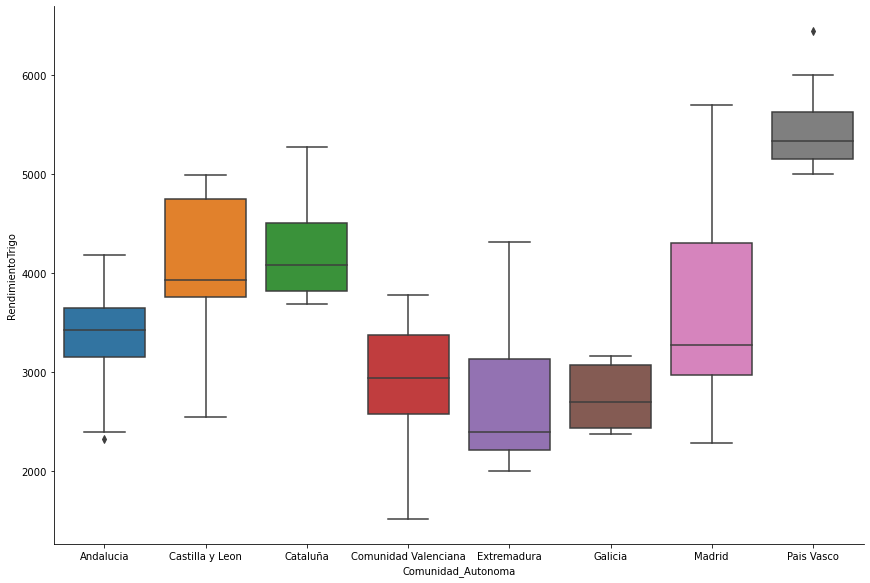

In [144]:
sns.catplot(x="Comunidad_Autonoma", y="RendimientoTrigo", kind="box", height=8, aspect=1.5, data=datos)

Looking at this graph the previous conclusions are demonstrated.

Next, the case of the potato will be studied.

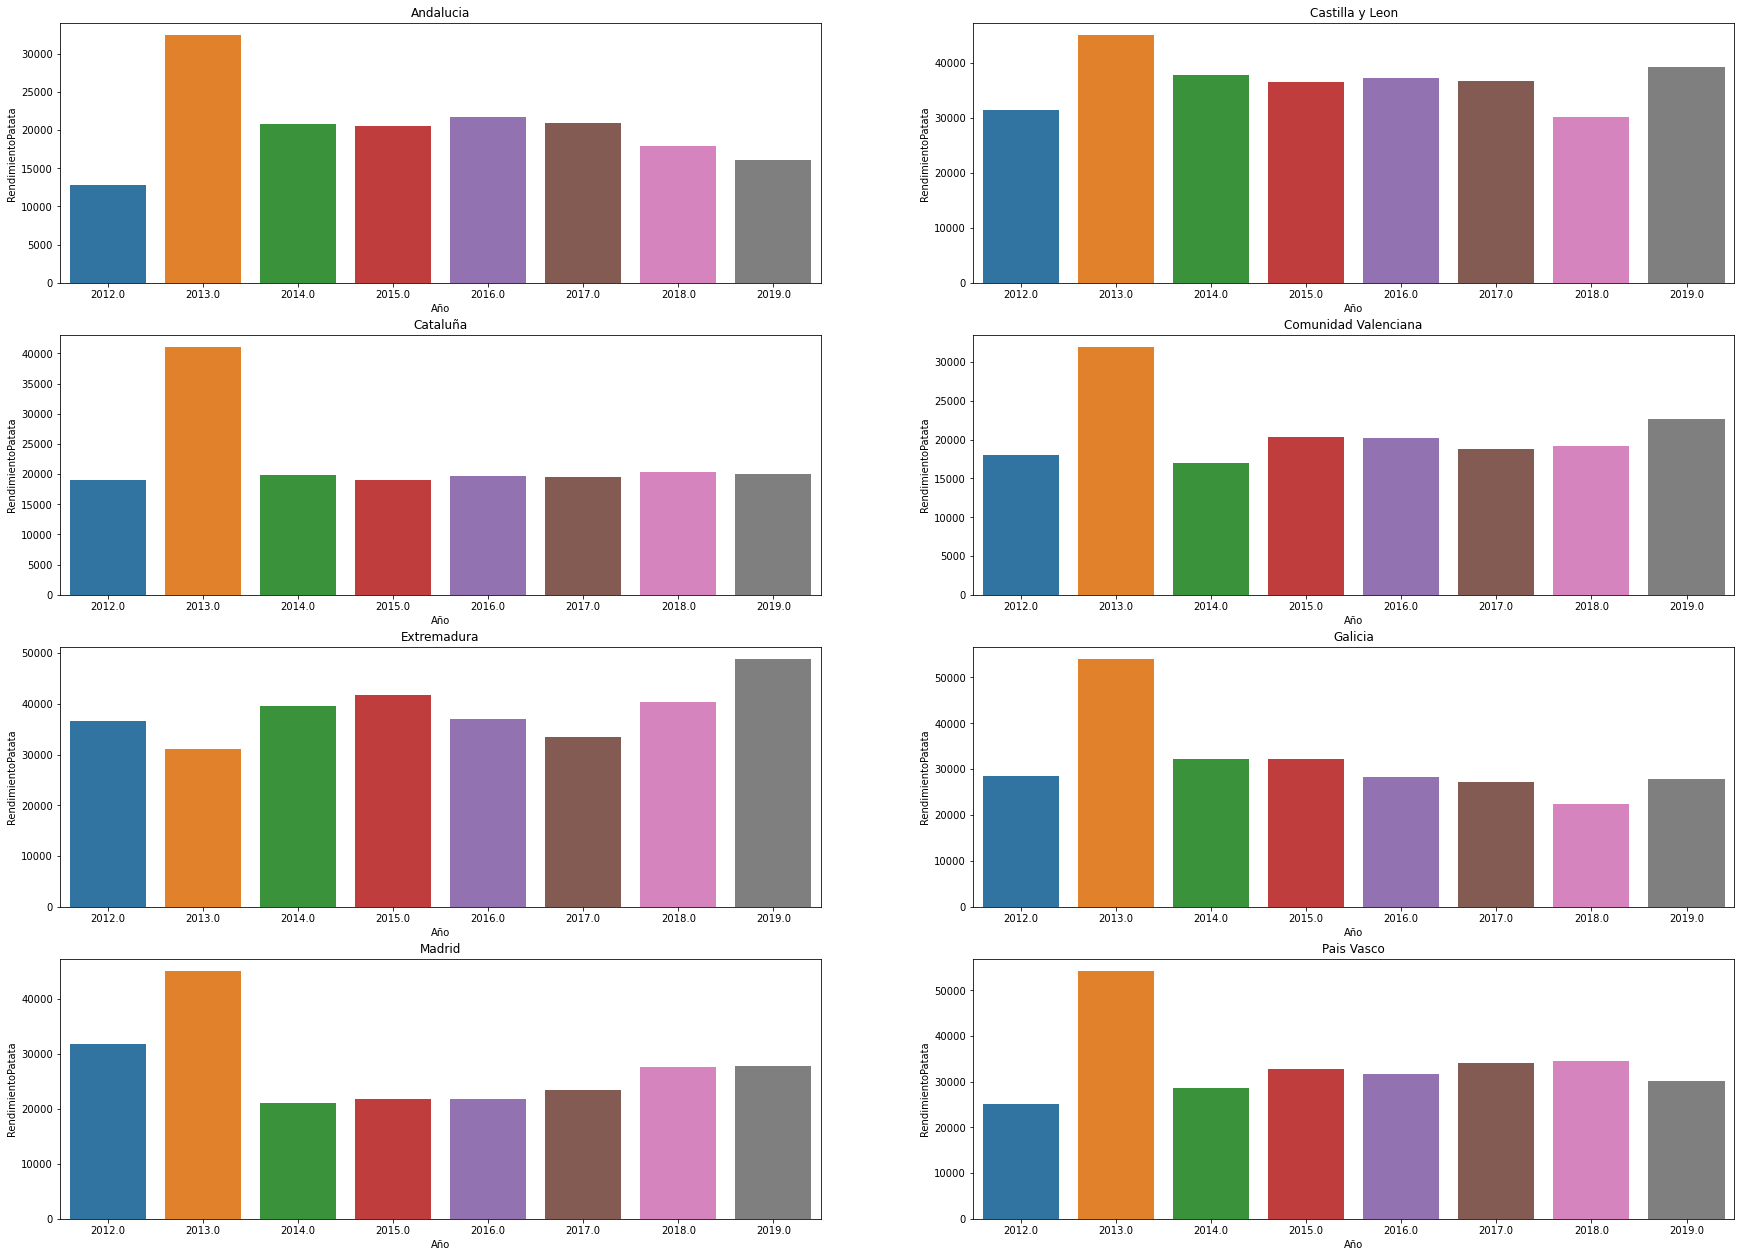

In [145]:
# Potato yield
fig, axes = plt.subplots(4, 2, figsize=(30, 22))
axes[0,0].set_title('Andalucia')
sns.barplot(x=datos['Año'], y='RendimientoPatata', data=datosAndalucia, ax=axes[0,0])
axes[0,1].set_title('Castilla y Leon')
sns.barplot(x=datos['Año'], y='RendimientoPatata', data=datosCastillaYLeon, ax=axes[0,1])
axes[1,0].set_title('Cataluña')
sns.barplot(x=datos['Año'], y='RendimientoPatata', data=datosCataluña, ax=axes[1,0])
axes[1,1].set_title('Comunidad Valenciana')
sns.barplot(x=datos['Año'], y='RendimientoPatata', data=datosComunidadValenciana, ax=axes[1,1])
axes[2,0].set_title('Extremadura')
sns.barplot(x=datos['Año'], y='RendimientoPatata', data=datosExtremadura, ax=axes[2,0])
axes[2,1].set_title('Galicia')
sns.barplot(x=datos['Año'], y='RendimientoPatata', data=datosGalicia, ax=axes[2,1])
axes[3,0].set_title('Madrid')
sns.barplot(x=datos['Año'], y='RendimientoPatata', data=datosMadrid, ax=axes[3,0])
axes[3,1].set_title('Pais Vasco')
sns.barplot(x=datos['Año'], y='RendimientoPatata', data=datosPaisVasco, ax=axes[3,1])
plt.show()

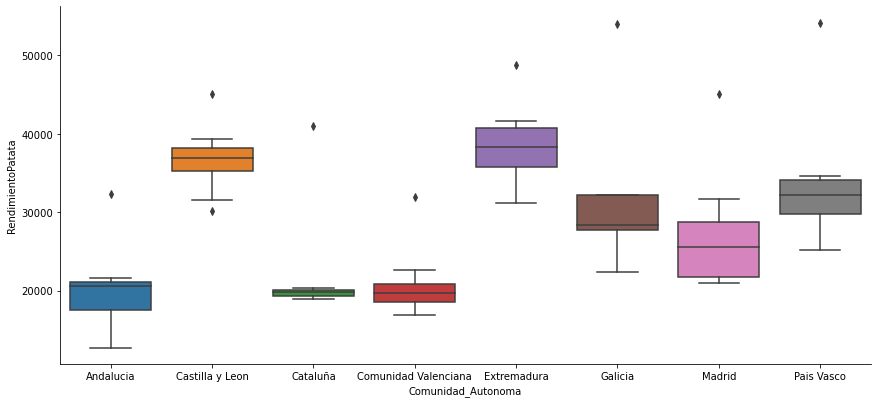

In [146]:
sns.catplot(x="Comunidad_Autonoma", y="RendimientoPatata", kind="box", height=5.5, aspect=2.2, data=datos)

In contrast to wheat, potato yields per region are more similar. However, it seems that Extremadura is in first place.

In [147]:
datos.groupby('Comunidad_Autonoma')['RendimientoPatata'].mean()

Comunidad_Autonoma
Andalucia               20380.125
Castilla y Leon         36786.250
Cataluña                22309.250
Comunidad Valenciana    21000.500
Extremadura             38577.875
Galicia                 31588.125
Madrid                  27515.250
Pais Vasco              33908.875
Name: RendimientoPatata, dtype: float64

It can be seen that Extremadura has the highest average with an approximate value of 39000kg/ha per year and that the difference between the rest of the averages is not so big.

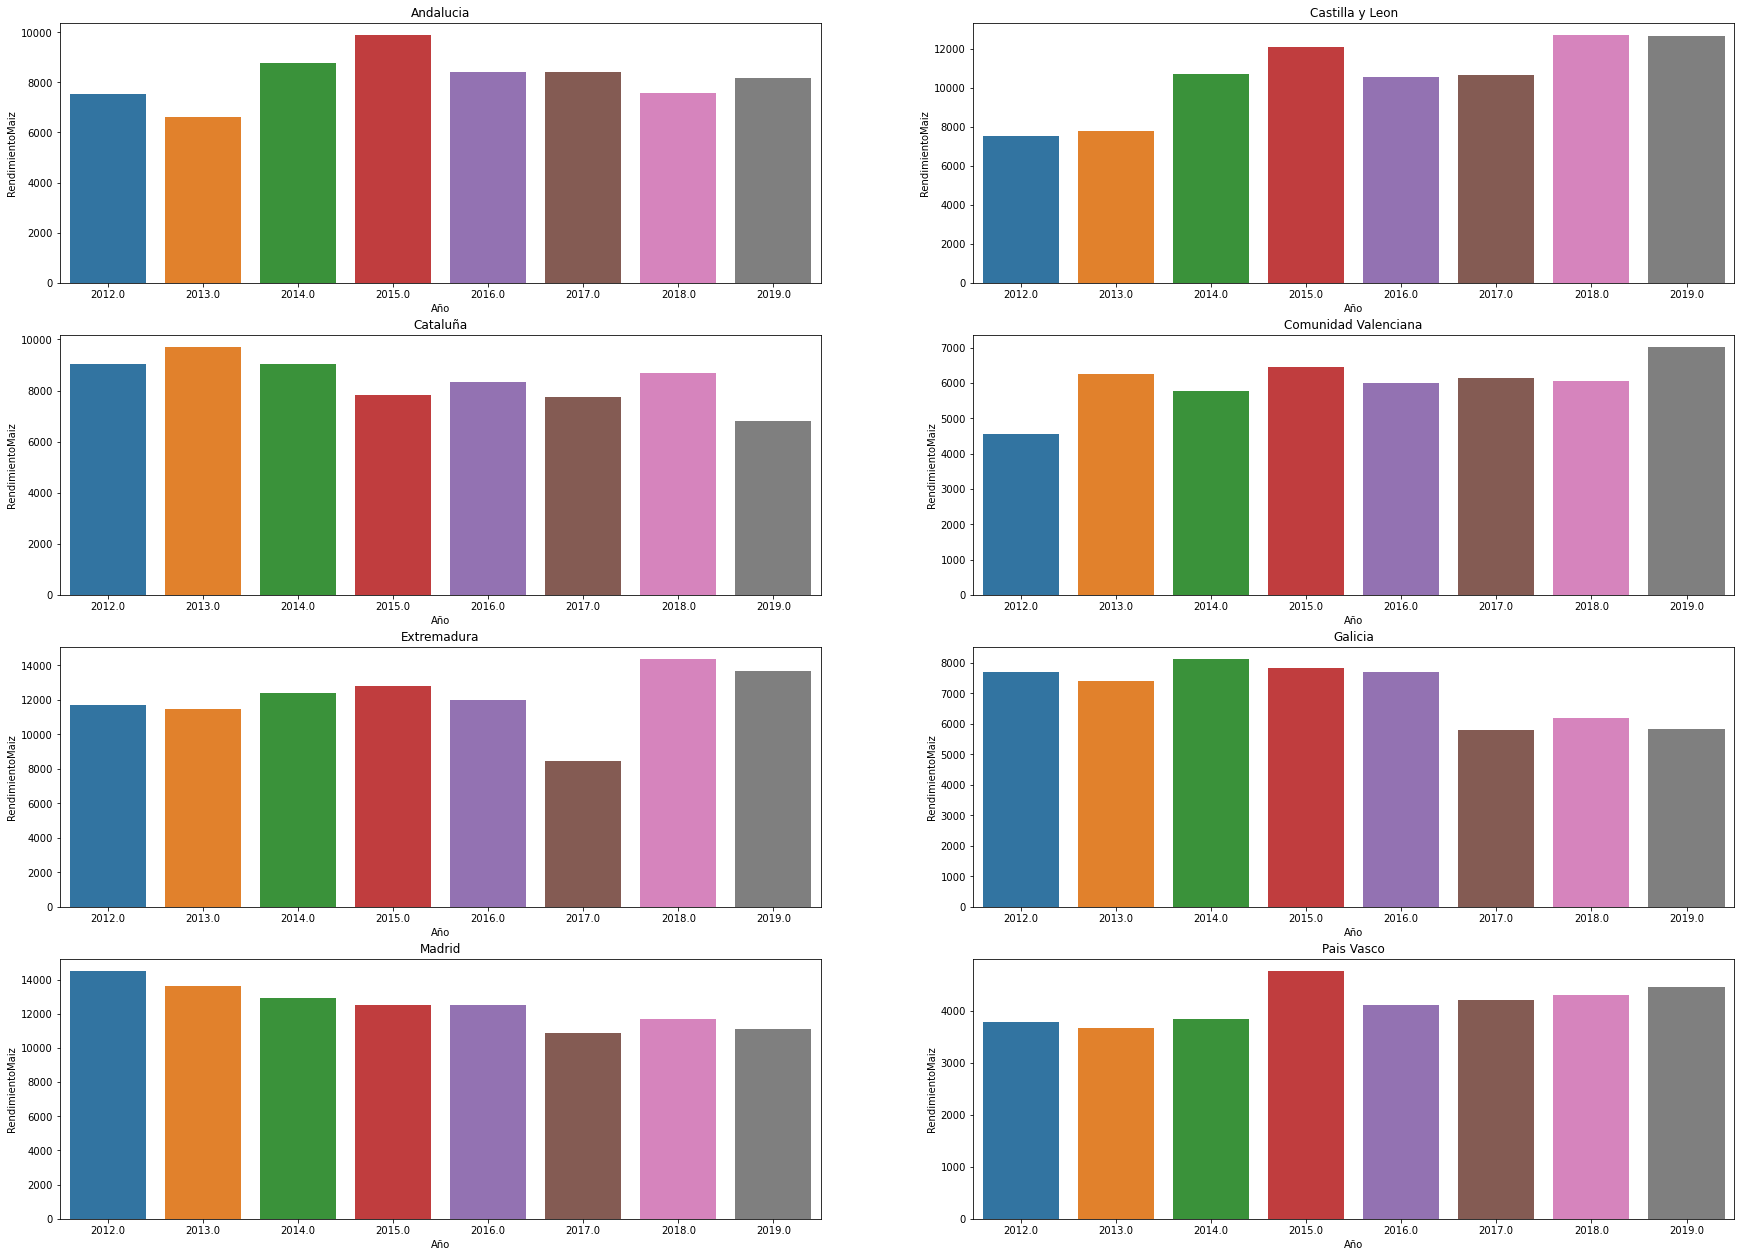

In [148]:
# Corn yield
fig, axes = plt.subplots(4, 2, figsize=(30, 22))
axes[0,0].set_title('Andalucia')
sns.barplot(x=datos['Año'], y='RendimientoMaiz', data=datosAndalucia, ax=axes[0,0])
axes[0,1].set_title('Castilla y Leon')
sns.barplot(x=datos['Año'], y='RendimientoMaiz', data=datosCastillaYLeon, ax=axes[0,1])
axes[1,0].set_title('Cataluña')
sns.barplot(x=datos['Año'], y='RendimientoMaiz', data=datosCataluña, ax=axes[1,0])
axes[1,1].set_title('Comunidad Valenciana')
sns.barplot(x=datos['Año'], y='RendimientoMaiz', data=datosComunidadValenciana, ax=axes[1,1])
axes[2,0].set_title('Extremadura')
sns.barplot(x=datos['Año'], y='RendimientoMaiz', data=datosExtremadura, ax=axes[2,0])
axes[2,1].set_title('Galicia')
sns.barplot(x=datos['Año'], y='RendimientoMaiz', data=datosGalicia, ax=axes[2,1])
axes[3,0].set_title('Madrid')
sns.barplot(x=datos['Año'], y='RendimientoMaiz', data=datosMadrid, ax=axes[3,0])
axes[3,1].set_title('Pais Vasco')
sns.barplot(x=datos['Año'], y='RendimientoMaiz', data=datosPaisVasco, ax=axes[3,1])
plt.show()

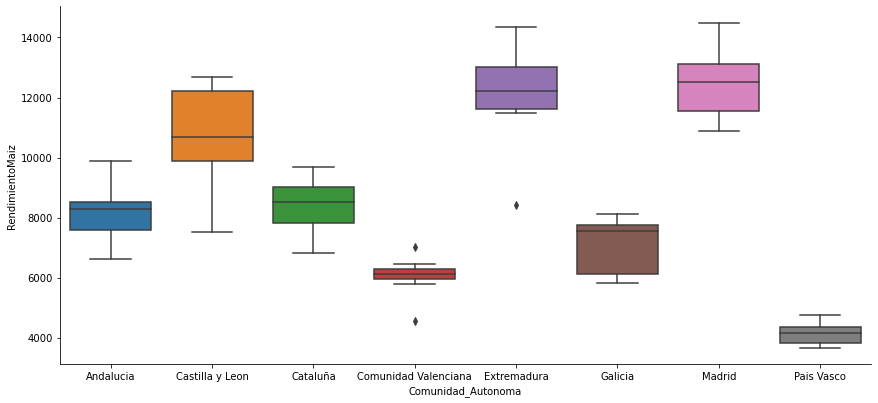

In [149]:
sns.catplot(x="Comunidad_Autonoma", y="RendimientoMaiz", kind="box", height=5.5, aspect=2.2, data=datos)

In terms of wheat cultivation, Madrid and Extremadura are the two regions that make the best use of their resources for this type of crop.

In [150]:
datos.groupby('Comunidad_Autonoma')['RendimientoMaiz'].mean()

Comunidad_Autonoma
Andalucia                8180.000
Castilla y Leon         10578.125
Cataluña                 8395.000
Comunidad Valenciana     6035.750
Extremadura             12101.000
Galicia                  7078.000
Madrid                  12471.375
Pais Vasco               4141.000
Name: RendimientoMaiz, dtype: float64

From these values the following interesting conclusion can be drawn: it seems that the climate in the northern regions of the country is not favourable for corn, as these are the places with the lowest corn yields, whereas the centre regions of the country are the best ones. However, this will be discussed later when comparing crop yields with rainfall levels.

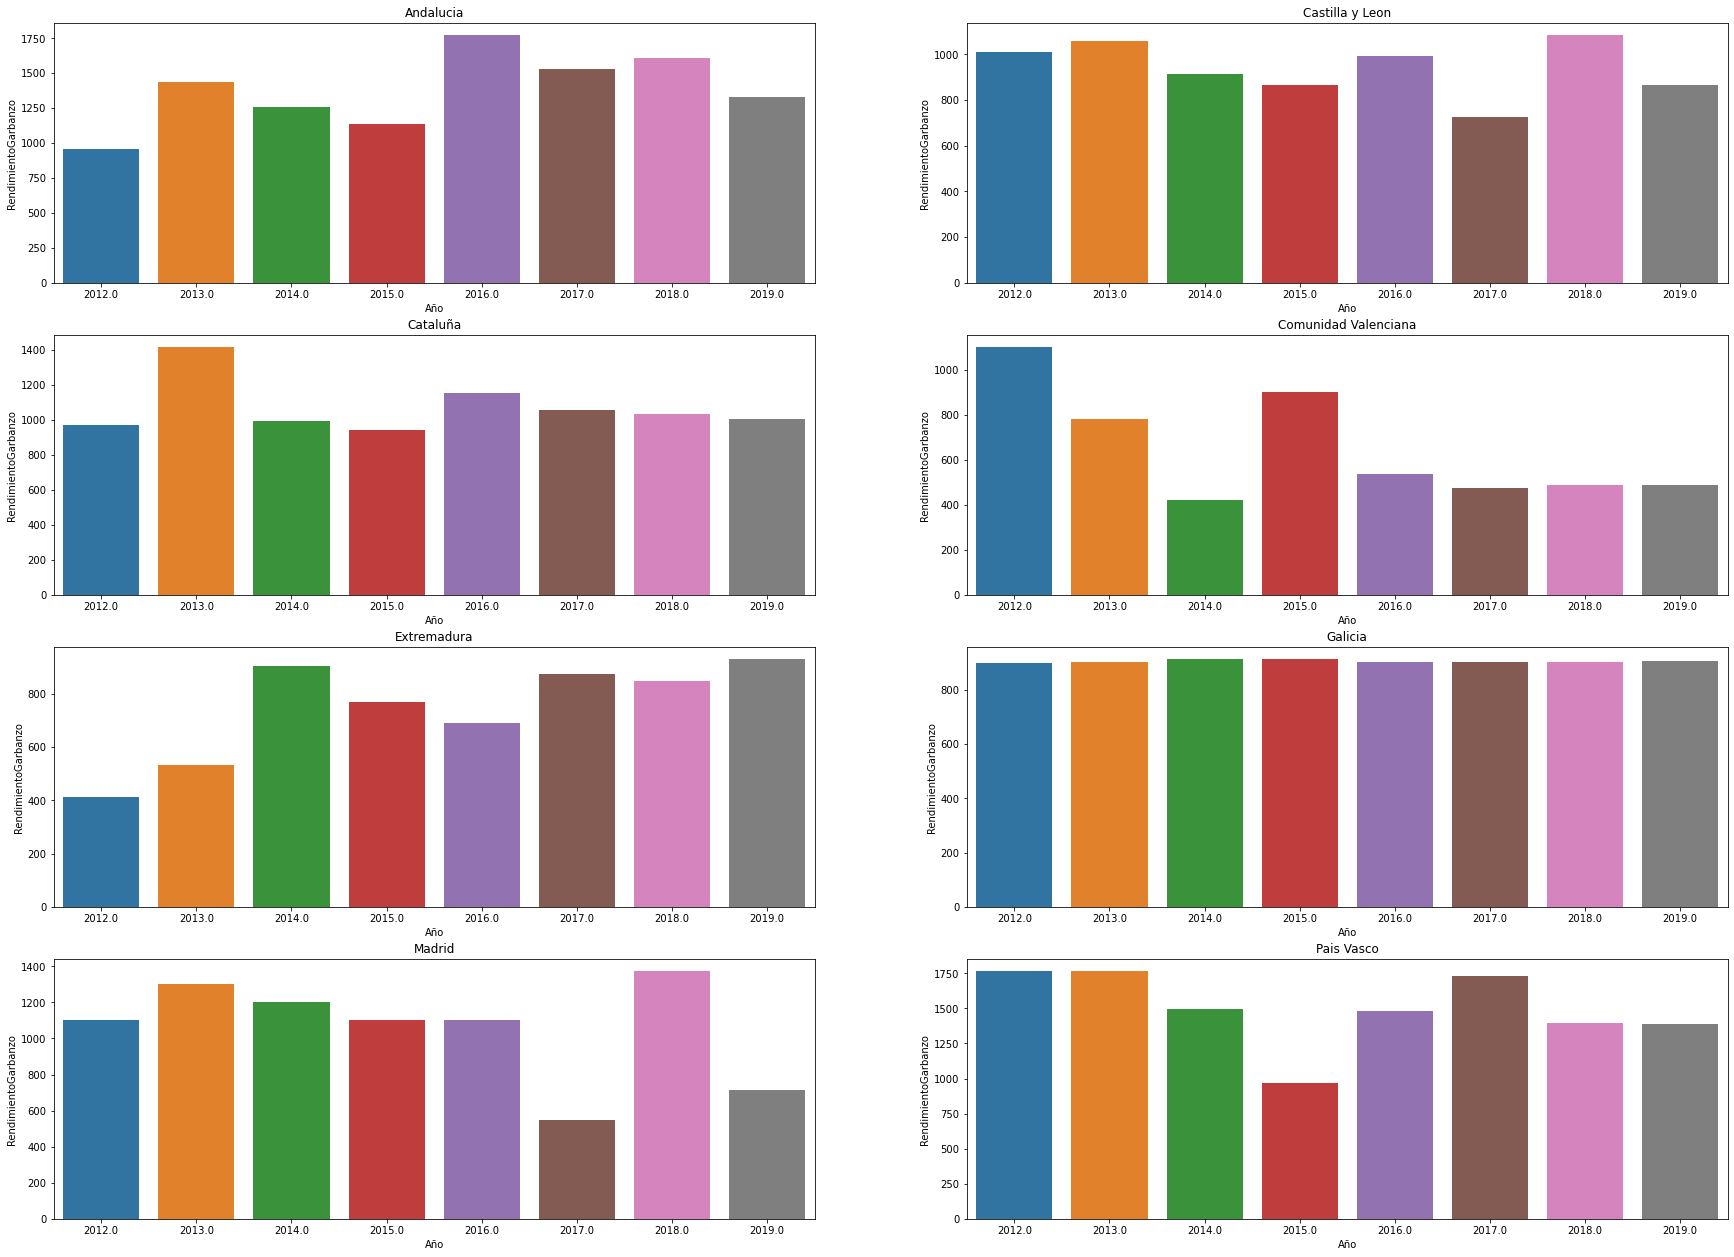

In [151]:
# Chickpea yield
fig, axes = plt.subplots(4, 2, figsize=(30, 22))
axes[0,0].set_title('Andalucia')
sns.barplot(x=datos['Año'], y='RendimientoGarbanzo', data=datosAndalucia, ax=axes[0,0])
axes[0,1].set_title('Castilla y Leon')
sns.barplot(x=datos['Año'], y='RendimientoGarbanzo', data=datosCastillaYLeon, ax=axes[0,1])
axes[1,0].set_title('Cataluña')
sns.barplot(x=datos['Año'], y='RendimientoGarbanzo', data=datosCataluña, ax=axes[1,0])
axes[1,1].set_title('Comunidad Valenciana')
sns.barplot(x=datos['Año'], y='RendimientoGarbanzo', data=datosComunidadValenciana, ax=axes[1,1])
axes[2,0].set_title('Extremadura')
sns.barplot(x=datos['Año'], y='RendimientoGarbanzo', data=datosExtremadura, ax=axes[2,0])
axes[2,1].set_title('Galicia')
sns.barplot(x=datos['Año'], y='RendimientoGarbanzo', data=datosGalicia, ax=axes[2,1])
axes[3,0].set_title('Madrid')
sns.barplot(x=datos['Año'], y='RendimientoGarbanzo', data=datosMadrid, ax=axes[3,0])
axes[3,1].set_title('Pais Vasco')
sns.barplot(x=datos['Año'], y='RendimientoGarbanzo', data=datosPaisVasco, ax=axes[3,1])
plt.show()

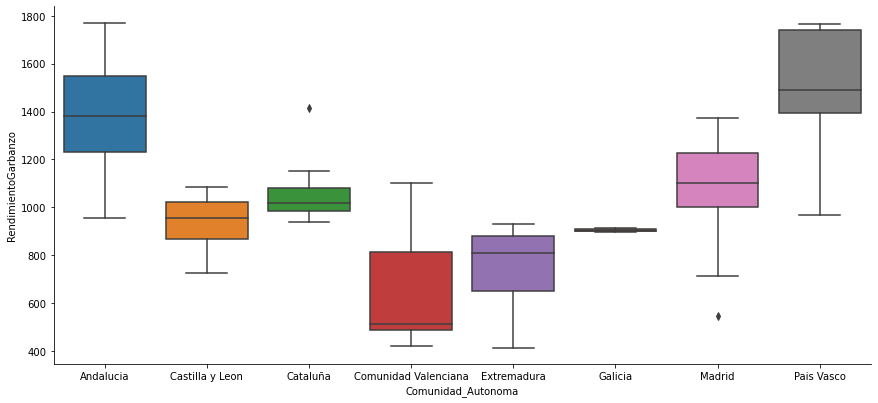

In [152]:
sns.catplot(x="Comunidad_Autonoma", y="RendimientoGarbanzo", kind="box", height=5.5, aspect=2.2, data=datos)

Andalucia and Pais Vasco are the two regions with the highest chickpea yields.

In [153]:
datos.groupby('Comunidad_Autonoma')['RendimientoGarbanzo'].mean()

Comunidad_Autonoma
Andalucia               1378.375
Castilla y Leon          940.000
Cataluña                1070.000
Comunidad Valenciana     649.750
Extremadura              745.125
Galicia                  903.500
Madrid                  1054.375
Pais Vasco              1498.625
Name: RendimientoGarbanzo, dtype: float64

Among the four crops studied, it is the least cultivated in the country.

## 3. CORRELATION BETWEEN FEATURES

The following types of correlation are going to be calculated:
- Types of climate in Spain.
- Correlation between the level of precipitation and different crops.

In [154]:
datosCorrelacion=datos.loc[0:63,['Comunidad_Autonoma','Precipitacion_Anual', 'RendimientoTrigo','RendimientoPatata', 'RendimientoMaiz', 'RendimientoGarbanzo']]
datosCorrelacion

,Comunidad_Autonoma,Precipitacion_Anual,RendimientoTrigo,RendimientoPatata,RendimientoMaiz,RendimientoGarbanzo
0,Andalucia,422.000,2324.0,12750.0,7530.0,954.0
1,Andalucia,445.000,3434.0,32395.0,6629.0,1436.0
2,Andalucia,465.875,3761.0,20740.0,8782.0,1261.0
3,Andalucia,302.000,3426.0,20531.0,9879.0,1137.0
4,Andalucia,496.000,2398.0,21673.0,8422.0,1771.0
...,...,...,...,...,...,...
59,Pais Vasco,1130.000,5200.0,32783.0,4760.0,970.0
60,Pais Vasco,1191.000,6450.0,31769.0,4104.0,1484.0
61,Pais Vasco,1175.000,6000.0,34051.0,4205.0,1731.0
62,Pais Vasco,1301.000,5500.0,34600.0,4309.0,1393.0


The following graph shows the types of climate in the country.

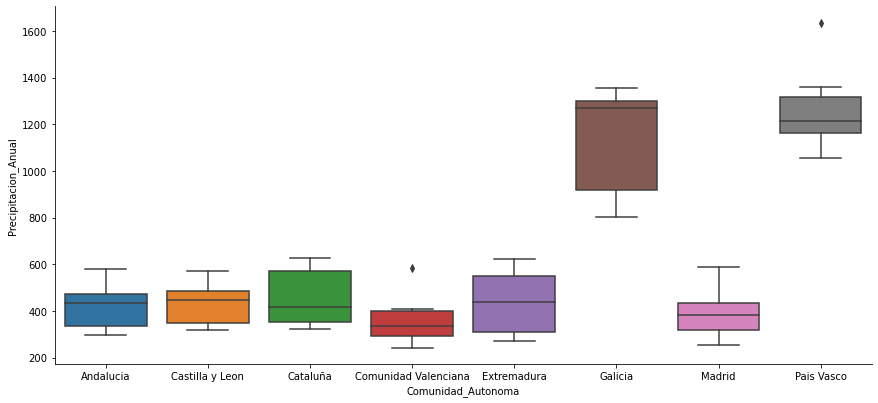

In [155]:
# Types of climate in Spain
sns.catplot(x="Comunidad_Autonoma", y="Precipitacion_Anual", kind="box", height=5.5, aspect=2.2, data=datos)

Galicia and Pais Vasco have a rainier climate than the rest of the autonomous communities. For this reason, Spain's climate is divided into these two groups.

Text(0.5, 1.0, 'Correlation Matrix')

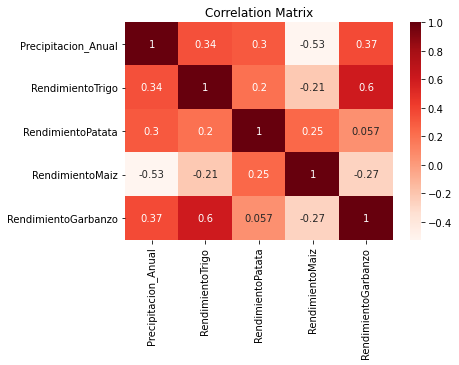

In [156]:
#Correlation between the level of precipitation and different crops.
sns.heatmap(datosCorrelacion.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

The following conclusions can be drawn from the upper matrix:
- Although the correlation between annual rainfall and wheat, potato and chickpea yields is small, it is positive. On the other hand, the correlation between annual rainfall and corn yield is negative.
- The correlation between wheat and chickpea yields is the highest.

The following graphs are drawn to observe these facts:

In [157]:
fig = px.scatter(datos, 
                 x='Precipitacion_Anual', 
                 y='RendimientoTrigo', 
                 opacity=0.8,
                 trendline='ols',
                 trendline_color_override='red',
                 title='Precipitacion Anual vs Rendimiento Trigo')
fig.update_traces(marker_size=5)
fig.show()

In [158]:
fig = px.scatter(datos, 
                 x='Precipitacion_Anual', 
                 y='RendimientoPatata', 
                 trendline='ols',
                 trendline_color_override='green',
                 opacity=0.8, 
                 title='Precipitacion Anual vs Rendimiento Patata')
fig.update_traces(marker_size=5)
fig.show()

In [159]:
fig = px.scatter(datos, 
                 x='Precipitacion_Anual', 
                 y='RendimientoMaiz', 
                 trendline='ols',
                 trendline_color_override='yellow',
                 opacity=0.8, 
                 title='Precipitacion Anual vs Rendimiento Maiz')
fig.update_traces(marker_size=5)
fig.show()

In contrast to the other cases, as shown in the correlation matrix, the correlation is negative: when rainfall increases, corn yields decreases.

In [160]:
fig = px.scatter(datos, 
                 x='Precipitacion_Anual', 
                 y='RendimientoGarbanzo', 
                 trendline='ols',
                 trendline_color_override='orange',
                 opacity=0.8, 
                 title='Precipitacion Anual vs Rendimiento Garbanzo')
fig.update_traces(marker_size=5)
fig.show()

In the following, two correlation matrices will be created to make the values more visible in the matrix and observe the influence of monthly rainfall on the different crops.

In [161]:
# Enero/Junio
datosCorrelacionMeses=datos.loc[0:63,['Precipitacion_Enero', 'Precipitacion_Febrero', 'Precipitacion_Marzo', 'Precipitacion_Abril', 'Precipitacion_Mayo', 'Precipitacion_Junio', 'RendimientoTrigo','RendimientoPatata', 'RendimientoMaiz', 'RendimientoGarbanzo']]
datosCorrelacionMeses

,Precipitacion_Enero,Precipitacion_Febrero,Precipitacion_Marzo,Precipitacion_Abril,Precipitacion_Mayo,Precipitacion_Junio,RendimientoTrigo,RendimientoPatata,RendimientoMaiz,RendimientoGarbanzo
0,19.000000,3.000000,15.000000,43.000000,29.000000,0.000000,2324.0,12750.0,7530.0,954.0
1,44.000000,64.000000,160.000000,42.000000,17.000000,1.000000,3434.0,32395.0,6629.0,1436.0
2,62.375000,57.875000,28.875000,39.750000,11.250000,9.375000,3761.0,20740.0,8782.0,1261.0
3,44.000000,23.000000,44.000000,41.000000,2.000000,3.000000,3426.0,20531.0,9879.0,1137.0
4,38.000000,31.875000,23.125000,57.000000,94.500000,1.000000,2398.0,21673.0,8422.0,1771.0
...,...,...,...,...,...,...,...,...,...,...
59,202.000000,266.000000,135.000000,58.000000,45.000000,53.000000,5200.0,32783.0,4760.0,970.0
60,114.333333,290.333333,185.666667,57.333333,59.000000,53.666667,6450.0,31769.0,4104.0,1484.0
61,143.000000,83.000000,100.000000,50.333333,67.666667,95.333333,6000.0,34051.0,4205.0,1731.0
62,237.333333,211.666667,105.333333,158.666667,84.666667,68.000000,5500.0,34600.0,4309.0,1393.0


Text(0.5, 1.0, 'Correlation Matrix')

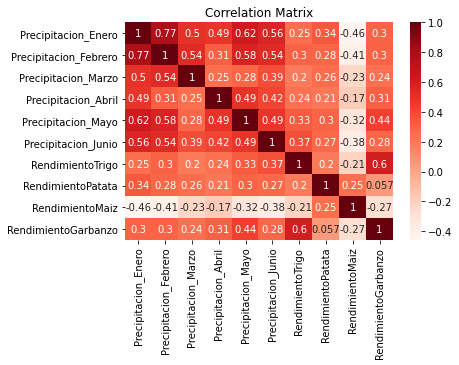

In [162]:
sns.heatmap(datosCorrelacionMeses.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [163]:
# Julio/Diciembre
datosCorrelacionMeses2=datos.loc[0:63,['Precipitacion_Julio', 'Precipitacion_Agosto', 'Precipitacion_Septiembre', 'Precipitacion_Octubre', 'Precipitacion_Noviembre', 'Precipitacion_Diciembre', 'RendimientoTrigo','RendimientoPatata', 'RendimientoMaiz', 'RendimientoGarbanzo']]
datosCorrelacionMeses2

,Precipitacion_Julio,Precipitacion_Agosto,Precipitacion_Septiembre,Precipitacion_Octubre,Precipitacion_Noviembre,Precipitacion_Diciembre,RendimientoTrigo,RendimientoPatata,RendimientoMaiz,RendimientoGarbanzo
0,0.000000,0.000000,65.000000,91.000000,143.000000,20.000000,2324.0,12750.0,7530.0,954.0
1,1.000000,14.000000,16.000000,32.000000,8.000000,54.000000,3434.0,32395.0,6629.0,1436.0
2,0.125000,0.000000,48.125000,62.875000,126.375000,19.250000,3761.0,20740.0,8782.0,1261.0
3,1.000000,2.000000,21.000000,73.000000,36.000000,13.000000,3426.0,20531.0,9879.0,1137.0
4,1.000000,1.750000,5.142857,64.375000,95.125000,86.125000,2398.0,21673.0,8422.0,1771.0
...,...,...,...,...,...,...,...,...,...,...
59,40.000000,94.000000,42.000000,60.000000,123.000000,13.000000,5200.0,32783.0,4760.0,970.0
60,54.000000,26.000000,79.000000,46.000000,199.666667,26.000000,6450.0,31769.0,4104.0,1484.0
61,39.333333,73.000000,89.000000,45.000000,185.333333,204.333333,6000.0,34051.0,4205.0,1731.0
62,85.333333,35.333333,25.333333,146.666667,96.333333,46.666667,5500.0,34600.0,4309.0,1393.0


Text(0.5, 1.0, 'Correlation Matrix')

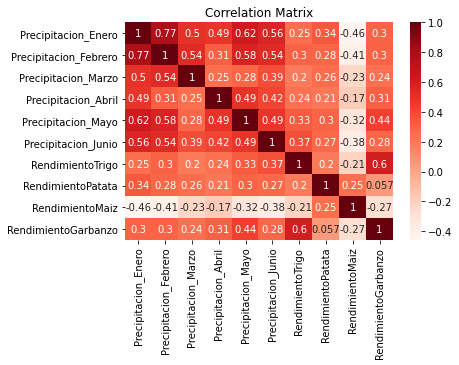

In [164]:
sns.heatmap(datosCorrelacionMeses.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

The following results are obtained from the two correlation matrices above:
- July's rainfall level has the greatest influence on wheat productivity.
- For potatoes, even if there are no predominant months, January's rainfall level has the biggest impact.
- It can be seen that in the case of corn yields, a higher level of precipitation in the month of August negatively affects this feature.
- May's rainfall level has the biggest influence on chickpea productivity.

## 4. CONCLUSIONS OF THE EXPLORATORY ANALYSIS

- This has been the exploratory analysis of the database.
- As previously mentioned, in order to visualise the data more easily, 8 autonomous communities have been used in this exploratory analysis. However, in order to generate the model, we have not ruled out the possibility of using 17 autonomous communities, since we have created the complete database.

Once the exploratory analysis has been completed, we will proceed to do the train and test division.

# TRAIN AND TEST DIVISION

It is interesting to note that 80% of the data will be used in the training set and the remaining 20% in the test set.

In [165]:
datos=datos.dropna()

In [166]:
datos

,Comunidad_Autonoma,Año,Precipitacion_Enero,Precipitacion_Febrero,Precipitacion_Marzo,Precipitacion_Abril,Precipitacion_Mayo,Precipitacion_Junio,Precipitacion_Julio,Precipitacion_Agosto,Precipitacion_Septiembre,Precipitacion_Octubre,Precipitacion_Noviembre,Precipitacion_Diciembre,Precipitacion_Anual,RendimientoTrigo,RendimientoPatata,RendimientoMaiz,RendimientoGarbanzo,TempMax,TempMin,MediaTemperatura,DiasTempMenor0
0,Andalucia,2012.0,19.000000,3.000000,15.000000,43.000000,29.000000,0.000000,0.000000,0.000000,65.000000,91.000000,143.000000,20.000000,422.000,2324.0,12750.0,7530.0,954.0,42.8,-3.2,18.1,17.0
1,Andalucia,2013.0,44.000000,64.000000,160.000000,42.000000,17.000000,1.000000,1.000000,14.000000,16.000000,32.000000,8.000000,54.000000,445.000,3434.0,32395.0,6629.0,1436.0,39.9,-0.1,17.9,11.0
2,Andalucia,2014.0,62.375000,57.875000,28.875000,39.750000,11.250000,9.375000,0.125000,0.000000,48.125000,62.875000,126.375000,19.250000,465.875,3761.0,20740.0,8782.0,1261.0,40.2,0.0,18.6,6.0
3,Andalucia,2015.0,44.000000,23.000000,44.000000,41.000000,2.000000,3.000000,1.000000,2.000000,21.000000,73.000000,36.000000,13.000000,302.000,3426.0,20531.0,9879.0,1137.0,41.8,0.0,18.9,9.0
4,Andalucia,2016.0,38.000000,31.875000,23.125000,57.000000,94.500000,1.000000,1.000000,1.750000,5.142857,64.375000,95.125000,86.125000,496.000,2398.0,21673.0,8422.0,1771.0,42.3,0.0,18.7,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Pais Vasco,2015.0,202.000000,266.000000,135.000000,58.000000,45.000000,53.000000,40.000000,94.000000,42.000000,60.000000,123.000000,13.000000,1130.000,5200.0,32783.0,4760.0,970.0,37.1,-3.4,13.9,21.0
60,Pais Vasco,2016.0,114.333333,290.333333,185.666667,57.333333,59.000000,53.666667,54.000000,26.000000,79.000000,46.000000,199.666667,26.000000,1191.000,6450.0,31769.0,4104.0,1484.0,38.4,-2.3,13.7,22.0
61,Pais Vasco,2017.0,143.000000,83.000000,100.000000,50.333333,67.666667,95.333333,39.333333,73.000000,89.000000,45.000000,185.333333,204.333333,1175.000,6000.0,34051.0,4205.0,1731.0,36.8,-5.2,13.9,28.0
62,Pais Vasco,2018.0,237.333333,211.666667,105.333333,158.666667,84.666667,68.000000,85.333333,35.333333,25.333333,146.666667,96.333333,46.666667,1301.000,5500.0,34600.0,4309.0,1393.0,35.5,-5.4,13.9,18.0


In [167]:
rendimientos = ['RendimientoTrigo', 'RendimientoPatata', 'RendimientoMaiz', 'RendimientoGarbanzo']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datos.drop(rendimientos, axis = 'columns'),
                                                    datos[rendimientos],
                                                    train_size = 0.8,
                                                    random_state = 1234,
                                                    shuffle = True
                                                   )

y_train_trigo = y_train['RendimientoTrigo']
y_train_patata = y_train['RendimientoPatata']
y_train_maiz = y_train['RendimientoMaiz']
y_train_garbanzo = y_train['RendimientoGarbanzo']
y_test_trigo = y_test['RendimientoTrigo']
y_test_patata = y_test['RendimientoPatata']
y_test_maiz = y_test['RendimientoMaiz']
y_test_garbanzo = y_test['RendimientoGarbanzo']

In [168]:
y_train_patata

18    19908.0
45    27212.0
55    27723.0
36    36982.0
13    36730.0
25    31898.0
57    54177.0
63    30127.0
10    37808.0
7     16115.0
27    20369.0
14    30141.0
17    41007.0
46    22408.0
31    22592.0
35    41647.0
1     32395.0
42    32260.0
62    34600.0
2     20740.0
39    48775.0
48    31708.0
60    31769.0
0     12750.0
11    36554.0
3     20531.0
61    34051.0
34    39626.0
37    33480.0
59    32783.0
9     45037.0
16    19088.0
5     20875.0
28    20201.0
58    28537.0
44    28211.0
51    21792.0
43    32141.0
30    19174.0
26    16953.0
41    53956.0
23    20076.0
49    45037.0
15    39316.0
24    18009.0
52    21792.0
12    37172.0
53    23499.0
38    40444.0
19    18944.0
47    27934.0
Name: RendimientoPatata, dtype: float64

In [169]:
X_train

,Comunidad_Autonoma,Año,Precipitacion_Enero,Precipitacion_Febrero,Precipitacion_Marzo,Precipitacion_Abril,Precipitacion_Mayo,Precipitacion_Junio,Precipitacion_Julio,Precipitacion_Agosto,Precipitacion_Septiembre,Precipitacion_Octubre,Precipitacion_Noviembre,Precipitacion_Diciembre,Precipitacion_Anual,TempMax,TempMin,MediaTemperatura,DiasTempMenor0
18,Cataluña,2014.0,34.500000,22.500000,20.250000,45.500000,57.000000,21.500000,44.750000,58.750000,154.250000,18.250000,122.250000,29.000000,628.000000,35.9,-1.8,17.1,12.0
45,Galicia,2017.0,51.000000,148.750000,109.500000,14.750000,98.500000,32.250000,15.250000,28.500000,22.250000,27.000000,73.500000,181.500000,803.250000,37.7,-3.3,14.9,19.0
55,Madrid,2019.0,19.000000,1.000000,10.000000,83.000000,0.000000,2.000000,9.000000,58.000000,33.000000,43.000000,44.000000,90.000000,392.000000,40.7,-1.8,16.1,9.0
36,Extremadura,2016.0,69.500000,41.000000,33.000000,88.000000,82.000000,4.000000,13.000000,0.000000,10.000000,62.500000,93.500000,35.500000,529.000000,43.0,-1.4,17.4,4.0
13,Castilla y Leon,2017.0,9.000000,56.222222,16.333333,9.666667,50.333333,34.222222,28.222222,29.375000,1.222222,11.444444,25.555556,34.888889,320.375000,37.1,-8.7,13.0,73.0
25,Comunidad Valenciana,2013.0,5.000000,59.000000,49.000000,88.000000,14.000000,12.000000,1.000000,37.000000,1.000000,8.000000,8.000000,17.000000,299.000000,36.2,2.1,18.3,0.0
57,Pais Vasco,2013.0,305.000000,258.000000,115.000000,114.000000,155.000000,130.000000,35.000000,43.000000,64.000000,53.000000,306.000000,59.000000,1636.000000,37.8,-2.6,13.2,16.0
63,Pais Vasco,2019.0,224.333333,50.000000,44.333333,87.000000,107.000000,41.333333,88.666667,47.000000,69.333333,114.666667,368.333333,118.333333,1360.000000,39.8,-3.2,13.9,18.0
10,Castilla y Leon,2014.0,62.555556,53.777778,25.777778,35.333333,24.555556,27.625000,22.222222,4.222222,41.111111,57.222222,92.625000,17.000000,476.125000,35.4,-6.2,12.4,48.0
7,Andalucia,2019.0,26.000000,3.750000,15.375000,58.500000,0.000000,0.125000,0.500000,1.375000,47.000000,17.500000,54.625000,70.625000,295.250000,40.4,-0.5,18.5,10.0


In [170]:
y_train_garbanzo

18     991.0
45     900.0
55     714.0
36     691.0
13     726.0
25     783.0
57    1763.0
63    1391.0
10     914.0
7     1329.0
27     900.0
14    1084.0
17    1414.0
46     900.0
31     490.0
35     769.0
1     1436.0
42     911.0
62    1393.0
2     1261.0
39     930.0
48    1100.0
60    1484.0
0      954.0
11     866.0
3     1137.0
61    1731.0
34     903.0
37     874.0
59     970.0
9     1057.0
16     970.0
5     1528.0
28     538.0
58    1492.0
44     900.0
51    1100.0
43     912.0
30     490.0
26     422.0
41     900.0
23    1005.0
49    1300.0
15     867.0
24    1100.0
52    1100.0
12     995.0
53     548.0
38     848.0
19     939.0
47     907.0
Name: RendimientoGarbanzo, dtype: float64

In [171]:
X_test

,Comunidad_Autonoma,Año,Precipitacion_Enero,Precipitacion_Febrero,Precipitacion_Marzo,Precipitacion_Abril,Precipitacion_Mayo,Precipitacion_Junio,Precipitacion_Julio,Precipitacion_Agosto,Precipitacion_Septiembre,Precipitacion_Octubre,Precipitacion_Noviembre,Precipitacion_Diciembre,Precipitacion_Anual,TempMax,TempMin,MediaTemperatura,DiasTempMenor0
22,Cataluña,2018.0,30.00,70.250,45.250,74.500,50.000,15.666667,38.000000,65.50,34.000000,174.750000,105.000,9.250,594.50,39.3,-2.5,17.1,16.0
32,Extremadura,2012.0,7.00,0.000,2.000,35.000,27.000,0.000000,0.000000,0.00,49.000000,64.000000,99.000,61.000,345.00,42.9,-5.1,16.6,35.0
33,Extremadura,2013.0,52.00,69.000,197.000,25.000,17.000,3.000000,1.000000,2.00,28.000000,113.000000,2.000,60.000,570.00,40.5,-2.0,16.7,14.0
8,Castilla y Leon,2012.0,13.00,8.000,10.000,90.000,31.000,10.000000,15.000000,5.00,29.000000,72.000000,52.000,27.000,352.00,37.6,-8.4,11.8,87.0
6,Andalucia,2018.0,42.50,41.000,181.625,60.625,24.375,7.500000,0.000000,6.00,23.250000,95.375000,88.875,8.500,579.75,41.6,-0.9,17.9,8.0
56,Pais Vasco,2012.0,115.00,70.000,41.000,177.000,75.000,52.000000,35.000000,28.00,59.000000,153.000000,154.000,96.000,1055.00,37.9,-5.3,13.2,29.0
40,Galicia,2012.0,42.00,10.000,22.000,166.000,81.000,73.000000,24.000000,29.00,47.000000,98.000000,145.000,211.000,948.00,35.7,-3.0,14.0,24.0
20,Cataluña,2016.0,7.50,35.500,30.500,58.500,51.750,19.250000,7.666667,13.00,27.000000,69.000000,67.500,17.500,399.00,37.7,-2.2,16.9,22.0
4,Andalucia,2016.0,38.00,31.875,23.125,57.000,94.500,1.000000,1.000000,1.75,5.142857,64.375000,95.125,86.125,496.00,42.3,0.0,18.7,7.0
21,Cataluña,2017.0,54.75,23.750,66.000,24.000,16.750,27.666667,18.000000,21.25,35.750000,33.333333,5.500,4.500,322.00,38.3,-3.6,17.0,25.0


# PREPROCESSED

In [172]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 18 to 47
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comunidad_Autonoma        51 non-null     object 
 1   Año                       51 non-null     float64
 2   Precipitacion_Enero       51 non-null     float64
 3   Precipitacion_Febrero     51 non-null     float64
 4   Precipitacion_Marzo       51 non-null     float64
 5   Precipitacion_Abril       51 non-null     float64
 6   Precipitacion_Mayo        51 non-null     float64
 7   Precipitacion_Junio       51 non-null     float64
 8   Precipitacion_Julio       51 non-null     float64
 9   Precipitacion_Agosto      51 non-null     float64
 10  Precipitacion_Septiembre  51 non-null     float64
 11  Precipitacion_Octubre     51 non-null     float64
 12  Precipitacion_Noviembre   51 non-null     float64
 13  Precipitacion_Diciembre   51 non-null     float64
 14  Precipitaci

As we can see above, Comunidad_Autonoma is the only qualitative variable. The rest of the variables are numerical ones.

In order to divide these variables into two groups, the following step is carried out:

In [173]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object']).columns.to_list()

In [174]:
numeric_cols

['Año',
 'Precipitacion_Enero',
 'Precipitacion_Febrero',
 'Precipitacion_Marzo',
 'Precipitacion_Abril',
 'Precipitacion_Mayo',
 'Precipitacion_Junio',
 'Precipitacion_Julio',
 'Precipitacion_Agosto',
 'Precipitacion_Septiembre',
 'Precipitacion_Octubre',
 'Precipitacion_Noviembre',
 'Precipitacion_Diciembre',
 'Precipitacion_Anual',
 'TempMax',
 'TempMin',
 'MediaTemperatura',
 'DiasTempMenor0']

Once the variables have been divided into two groups, the following operations will be executed:

- Binarization of qualitative variable (Comunidad_Autonoma).
- Standardization and scaling of numerical variables.

In [175]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [176]:
preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                remainder='passthrough')

In [177]:
preprocessor.fit(X_train)
X_train_prep = preprocessor.transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [178]:
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = pd.DataFrame(X_train_prep, columns=labels)
datos_train_prep.head()

,Año,Precipitacion_Enero,Precipitacion_Febrero,Precipitacion_Marzo,Precipitacion_Abril,Precipitacion_Mayo,Precipitacion_Junio,Precipitacion_Julio,Precipitacion_Agosto,Precipitacion_Septiembre,Precipitacion_Octubre,Precipitacion_Noviembre,Precipitacion_Diciembre,Precipitacion_Anual,TempMax,TempMin,MediaTemperatura,DiasTempMenor0,Comunidad_Autonoma_Andalucia,Comunidad_Autonoma_Castilla y Leon,Comunidad_Autonoma_Cataluña,Comunidad_Autonoma_Comunidad Valenciana,Comunidad_Autonoma_Extremadura,Comunidad_Autonoma_Galicia,Comunidad_Autonoma_Madrid,Comunidad_Autonoma_Pais Vasco
0,-0.729362,-0.485049,-0.568994,-0.778900,-0.388819,0.591253,-0.233845,1.121513,1.723121,3.482236,-1.001752,0.354029,-0.434805,-0.007137,-1.042440,0.271037,0.526282,-0.386856,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.615125,-0.288906,1.081570,0.631845,-1.210360,1.867617,0.127043,-0.253690,0.320745,-0.604329,-0.802029,-0.267334,2.336412,0.439354,-0.300035,-0.313029,-0.456228,-0.044157,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.511449,-0.669305,-0.850080,-0.940919,0.613060,-1.161826,-0.888481,-0.545046,1.688351,-0.271522,-0.436822,-0.643339,0.673682,-0.608403,0.937306,0.271037,0.079687,-0.533727,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.166962,-0.068988,-0.327129,-0.577365,0.746644,1.360147,-0.821339,-0.358578,-1.000501,-0.983575,0.008274,-0.012416,-0.316687,-0.259363,1.885934,0.426788,0.660261,-0.778512,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.615125,-0.788180,-0.128117,-0.840810,-1.346170,0.386214,0.193253,0.351037,0.361310,-1.255325,-1.157092,-0.878430,-0.327792,-0.790884,-0.547503,-2.415666,-1.304760,2.599519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


The results of these operations can be seen in the table above:

- With the standardization and scaling of numerical variables, the predictors are equal in some way, so there will be no predominant feature or most influential feature for the response variable.
- It can be seen also that the qualitative variable has been divided into 8 columns, thanks to the binarization (range 0-1).

The following command shows better the new columns.

In [179]:
datos_train_prep.columns.tolist()

['Año',
 'Precipitacion_Enero',
 'Precipitacion_Febrero',
 'Precipitacion_Marzo',
 'Precipitacion_Abril',
 'Precipitacion_Mayo',
 'Precipitacion_Junio',
 'Precipitacion_Julio',
 'Precipitacion_Agosto',
 'Precipitacion_Septiembre',
 'Precipitacion_Octubre',
 'Precipitacion_Noviembre',
 'Precipitacion_Diciembre',
 'Precipitacion_Anual',
 'TempMax',
 'TempMin',
 'MediaTemperatura',
 'DiasTempMenor0',
 'Comunidad_Autonoma_Andalucia',
 'Comunidad_Autonoma_Castilla y Leon',
 'Comunidad_Autonoma_Cataluña',
 'Comunidad_Autonoma_Comunidad Valenciana',
 'Comunidad_Autonoma_Extremadura',
 'Comunidad_Autonoma_Galicia',
 'Comunidad_Autonoma_Madrid',
 'Comunidad_Autonoma_Pais Vasco']

Then we are going to start with linear regression.

## LINEAR REGRESSION WHEAT

In [180]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [181]:
lm.fit(X=datos_train_prep, y=y_train_trigo)

LinearRegression()

In [182]:
from sklearn import metrics

np.sqrt(metrics.mean_squared_error(y_pred= lm.predict(datos_train_prep), y_true=y_train_trigo))


494.66995622091054

It can be seen that the error range lies between ± 495.

In [183]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = lm,
                X         = datos_train_prep,
                y         = y_train_trigo,
                 scoring   = 'neg_mean_squared_error',
                cv        = 10
             )

In [184]:
pd.Series(np.sqrt(-cv_scores)).describe()

count      10.000000
mean      914.614265
std       407.693274
min       600.187114
25%       659.007217
50%       718.058483
75%      1109.287106
max      1863.497436
dtype: float64

In [185]:
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import cross_validate

In [186]:
np.sqrt(-cv_scores)/datos['RendimientoTrigo'].mean()


array([0.19583984, 0.18532144, 0.16516165, 0.51280393, 0.22050448,
       0.33350866, 0.199356  , 0.17753673, 0.18002349, 0.34681223])

In [187]:
print(f"Métricas validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [ -506473.81274926  -453530.24921227  -360224.57188513 -3472622.69229925
  -642080.877385   -1468821.93794285  -524823.79074515  -416228.0385812
  -427969.92963559 -1588340.89238291]
Media métricas de validación cruzada: -986111.6792818606


In [188]:
val = cross_validate(
                estimator = lm,
                X         = datos_train_prep,
                y         = y_train_trigo,
                 scoring   = 'neg_mean_squared_error',
                cv        = 10)

In [189]:
lm = LinearRegression()
lm.fit(X=datos_train_prep, y=y_train_trigo)

LinearRegression()

In [190]:
pred_test = lm.predict(X_test_prep)

metrics.mean_squared_error(y_pred=pred_test, y_true=y_test_trigo)/datos['RendimientoTrigo'].mean()

684.8775333088637

In [191]:
np.sqrt(metrics.mean_squared_error(y_pred=pred_test, y_true=y_test_trigo))/datos['RendimientoTrigo'].mean()

0.4341279356705271

Conclusion: 
With this result obtained from the linear regression of wheat, it is feasible to perform the calculations with another type of model, as the error is 43.4%. It has been decided to study the error with the Random Forest to see if this value improves.

## RANDOM FOREST WHEAT

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X=datos_train_prep, y=y_train_trigo)

RandomForestRegressor()

In [193]:
cv_scores = cross_val_score(
                estimator = rf,
                X         = datos_train_prep,
                y         = y_train_trigo,
                 scoring   = 'neg_mean_squared_error',
                cv        = 10
             )
np.sqrt(-cv_scores)/datos['RendimientoTrigo'].mean()

array([0.28636431, 0.11556252, 0.23273011, 0.19864095, 0.23205399,
       0.22573681, 0.21225582, 0.23080847, 0.32837892, 0.2867888 ])

In [194]:
val = cross_validate(
                estimator = rf,
                X         = datos_train_prep,
                y         = y_train_trigo,
                 scoring   = 'neg_mean_squared_error',
                cv        = 10)

In [195]:
rf = RandomForestRegressor()
rf.fit(X=datos_train_prep, y=y_train_trigo)

RandomForestRegressor()

In [196]:
pred_test = rf.predict(X_test_prep)

np.sqrt(metrics.mean_squared_error(y_pred=pred_test, y_true=y_test_trigo))/datos['RendimientoTrigo'].mean()

0.19929012690606693

Conclusion:
It can be seen that the error decreases considerably using Random Forest. However, the yield prediction error of the other three crops will be calculated with these two methods, to see if this decrease in error was a one-off event or if the Random Forest is more efficient.

## LINEAR REGRESSION POTATO

In [197]:
lm.fit(X=datos_train_prep, y=y_train_patata)

LinearRegression()

In [198]:
from sklearn import metrics

np.sqrt(metrics.mean_squared_error(y_pred= lm.predict(datos_train_prep), y_true=y_train_patata))

4157.8530599823125

It can be seen that the error range lies between ± 4158. This value is higher than in the case of wheat. However, it can be seen in the dataset that the values of RendimientoPatata are higher than RendimientoTrigo, so it is normal.

In [199]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = lm,
                X         = datos_train_prep,
                y         = y_train_patata,
                 scoring   = 'neg_mean_squared_error',
                cv        = 10
             )

In [200]:
pd.Series(np.sqrt(-cv_scores)).describe()

count       10.000000
mean      9767.310005
std       3685.011465
min       3001.496269
25%       7607.625978
50%      10296.500480
75%      12885.794892
max      13696.639220
dtype: float64

In [201]:
np.sqrt(-cv_scores)/datos['RendimientoPatata'].mean()

array([0.2608008 , 0.47216307, 0.26662577, 0.29338718, 0.44973917,
       0.42762613, 0.41651358, 0.46589383, 0.21085659, 0.10347032])

In [202]:
print(f"Métricas validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-5.72350180e+07 -1.87597926e+08 -5.98202519e+07 -7.24312971e+07
 -1.70202296e+08 -1.53876555e+08 -1.45983015e+08 -1.82649255e+08
 -3.74126386e+07 -9.00897985e+06]
Media métricas de validación cruzada: -107621723.27172787


In [203]:
val = cross_validate(
                estimator = lm,
                X         = datos_train_prep,
                y         = y_train_patata,
                 scoring   = 'neg_mean_squared_error',
                cv        = 10)

In [204]:
lm = LinearRegression()
lm.fit(X=datos_train_prep, y=y_train_patata)
pred_test = lm.predict(X_test_prep)

metrics.mean_squared_error(y_pred=pred_test, y_true=y_test_patata)/datos['RendimientoPatata'].mean()

8215.57847557001

In [205]:
np.sqrt(metrics.mean_squared_error(y_pred=pred_test, y_true=y_test_patata))/datos['RendimientoPatata'].mean()

0.5321794195081619

The error is bigger than in the case of wheat (53,2% > 43,4%).

## RANDOM FOREST POTATO

In [206]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X=datos_train_prep, y=y_train_patata)

RandomForestRegressor()

In [207]:
cv_scores = cross_val_score(
                estimator = rf,
                X         = datos_train_prep,
                y         = y_train_patata,
                 scoring   = 'neg_mean_squared_error',
                cv        = 10
             )
np.sqrt(-cv_scores)/datos['RendimientoPatata'].mean()

array([0.25662498, 0.32085693, 0.29992711, 0.33629577, 0.29334256,
       0.18079375, 0.19827747, 0.36658012, 0.33894507, 0.24679282])

In [208]:
rf = RandomForestRegressor()
rf.fit(X=datos_train_prep, y=y_train_patata)

RandomForestRegressor()

In [209]:
pred_test = rf.predict(X_test_prep)

np.sqrt(metrics.mean_squared_error(y_pred=pred_test, y_true=y_test_patata))/datos['RendimientoPatata'].mean()

0.25955023216943346

Conclusion: 
As in the case of wheat, the random forest method predicts potato yield better than linear regression (0,28 < 0,53).

## LINEAR REGRESSION CORN

In [210]:
lm.fit(X=datos_train_prep, y=y_train_maiz)
np.sqrt(metrics.mean_squared_error(y_pred= lm.predict(datos_train_prep), y_true=y_train_maiz))
cv_scores = cross_val_score(
                estimator = lm,
                X         = datos_train_prep,
                y         = y_train_maiz,
                 scoring   = 'neg_mean_squared_error',
                cv        = 10
             )
pd.Series(np.sqrt(-cv_scores)).describe()
np.sqrt(-cv_scores)/datos['RendimientoMaiz'].mean()
pred_test = lm.predict(X_test_prep)

np.sqrt(metrics.mean_squared_error(y_pred=pred_test, y_true=y_test_maiz))/datos['RendimientoMaiz'].mean()
print(f"Métricas validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")
val = cross_validate(
                estimator = lm,
                X         = datos_train_prep,
                y         = y_train_maiz,
                 scoring   = 'neg_mean_squared_error',
                cv        = 10)
lm = LinearRegression()
lm.fit(X=datos_train_prep, y=y_train_maiz)
pred_test = lm.predict(X_test_prep)

np.sqrt(metrics.mean_squared_error(y_pred=pred_test, y_true=y_test_maiz))/datos['RendimientoMaiz'].mean()

Métricas validación cruzada: [ -6593991.4402546   -1181924.84495061  -2735364.25598458
  -5696929.0113849   -2883082.66515202 -10364785.61659664
   -725925.65047627  -3053899.06276484  -5844116.38948647
  -4159504.97918324]
Media métricas de validación cruzada: -4323952.391623417


0.2696463579057685

Conclussion:
It is interesting to note that the error obtained when predicting corn yield with linear regression is much lower than for the previous crops (using linear regression too).

However, let's see if this error decreases more with random forest.

## RANDOM FOREST CORN

In [211]:
rf = RandomForestRegressor()
rf.fit(X=datos_train_prep, y=y_train_maiz)
cv_scores = cross_val_score(
                estimator = rf,
                X         = datos_train_prep,
                y         = y_train_maiz,
                 scoring   = 'neg_mean_squared_error',
                cv        = 10
             )
np.sqrt(-cv_scores)/datos['RendimientoMaiz'].mean()
val = cross_validate(
                estimator = rf,
                X         = datos_train_prep,
                y         = y_train_maiz,
                 scoring   = 'neg_mean_squared_error',
                cv        = 10)
pred_test = rf.predict(X_test_prep)

np.sqrt(metrics.mean_squared_error(y_pred=pred_test, y_true=y_test_maiz))/datos['RendimientoMaiz'].mean()

0.14777958626803728

Conclussion:
Indeed, as with other crops, the random forest method is a better predictor.

## LINEAR REGRESSION CHICKPEA

In [212]:
lm.fit(X=datos_train_prep, y=y_train_maiz)
np.sqrt(metrics.mean_squared_error(y_pred= lm.predict(datos_train_prep), y_true=y_train_garbanzo))
cv_scores = cross_val_score(
                estimator = lm,
                X         = datos_train_prep,
                y         = y_train_garbanzo,
                 scoring   = 'neg_mean_squared_error',
                cv        = 10
             )
pd.Series(np.sqrt(-cv_scores)).describe()
np.sqrt(-cv_scores)/datos['RendimientoGarbanzo'].mean()
pred_test = lm.predict(X_test_prep)

np.sqrt(metrics.mean_squared_error(y_pred=pred_test, y_true=y_test_maiz))/datos['RendimientoGarbanzo'].mean()
print(f"Métricas validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")
val = cross_validate(
                estimator = lm,
                X         = datos_train_prep,
                y         = y_train_garbanzo,
                 scoring   = 'neg_mean_squared_error',
                cv        = 10)
lm = LinearRegression()
lm.fit(X=datos_train_prep, y=y_train_garbanzo)
pred_test = lm.predict(X_test_prep)

np.sqrt(metrics.mean_squared_error(y_pred=pred_test, y_true=y_test_garbanzo))/datos['RendimientoGarbanzo'].mean()

Métricas validación cruzada: [ -67419.04539897 -103978.14621106  -49928.68868848  -74071.68752886
 -127986.61966069  -95337.66325653  -92037.46613693  -75239.00302707
  -59533.41023383  -77120.87891939]
Media métricas de validación cruzada: -82265.26090618061


0.3714611842081493

## RANDOM FOREST CHICKPEA

In [213]:
rf = RandomForestRegressor()
rf.fit(X=datos_train_prep, y=y_train_garbanzo)
cv_scores = cross_val_score(
                estimator = rf,
                X         = datos_train_prep,
                y         = y_train_garbanzo,
                 scoring   = 'neg_mean_squared_error',
                cv        = 10
             )
np.sqrt(-cv_scores)/datos['RendimientoGarbanzo'].mean()
val = cross_validate(
                estimator = rf,
                X         = datos_train_prep,
                y         = y_train_garbanzo,
                 scoring   = 'neg_mean_squared_error',
                cv        = 10)
pred_test = rf.predict(X_test_prep)

np.sqrt(metrics.mean_squared_error(y_pred=pred_test, y_true=y_test_garbanzo))/datos['RendimientoGarbanzo'].mean()

0.33961418870805776

## CONCLUSSIONS

The model that best fits the yield data of the 4 crops is Random Forest, with a lower percentage error than Linear Regression.

# MODEL - CREATING THE MODEL (WHEAT)

In [214]:
#WE WILL START WITH THE RIDGE MODEL
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

m_ridge_1 = Ridge()
m_ridge_1.fit(X_train_prep, y_train_trigo)

Ridge()

In [215]:
# Preprocessing steps and modelling are combined in a single pipeline.
pipeTrigo = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
pipeTrigo.fit(X=X_train, y=y_train_trigo)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['Año', 'Precipitacion_Enero',
                                                   'Precipitacion_Febrero',
                                                   'Precipitacion_Marzo',
                                                   'Precipitacion_Abril',
                                                   'Precipitacion_Mayo',
                                                   'Precipitacion_Junio',
                                                   'Precipitacion_Julio',
                                                   'Precipitacion_Agosto',
                                                   'Precipitacion_Septiembre',
                                                   'Precipitacion_Octubre',
                                                   'Precipitacion_Noviemb

# VALIDATION WHEAT

In [216]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = pipeTrigo,
                X         = X_train,
                y         = y_train_trigo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-1118.3065413   -878.38098336  -988.74269575 -1113.29296048
 -1088.40772563]
Media métricas de validación cruzada: -1037.426181303262


In [217]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipeTrigo,
                X         = X_train,
                y         = y_train_trigo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")

Métricas de validación cruzada: [ -885.42828797 -1019.86893754 -1165.52893205  -817.01875234
 -1500.19656587  -931.05729003 -1078.56874725  -971.9578725
  -817.36071892  -907.33039385 -1227.68716701 -1076.98209213
  -743.06572015  -982.67080187  -737.60788406 -1171.62028892
  -781.04487075  -839.98448754  -785.56036746 -1045.97785781
  -978.25171414  -814.55483442 -1076.57532709  -995.37137687
  -968.11714072]

Media métricas de validación cruzada: -972.775537170124


In [218]:
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipeTrigo,
                X         = X_train,
                y         = y_train_trigo,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.018992,0.008998,0.131508,0.748379,-960.110278,-589.356780
1,0.009995,0.005997,0.311226,0.816752,-998.630877,-461.130772
2,0.011996,0.005999,-0.810559,0.886696,-1503.000345,-386.849489
3,0.010997,0.006997,0.105484,0.815301,-919.070653,-503.026811
4,0.016996,0.011996,-0.471445,0.847162,-1258.709662,-449.580118
5,0.019989,0.023994,-0.134093,0.778519,-1353.860981,-502.316556
6,0.009998,0.008997,0.008145,0.838004,-1050.959388,-474.583975
7,0.014004,0.006002,-0.194715,0.806647,-1293.969112,-487.458698
8,0.018997,0.009995,0.290311,0.739056,-966.654462,-573.641414
9,0.008999,0.004996,-0.241997,0.836744,-1269.355659,-460.348432


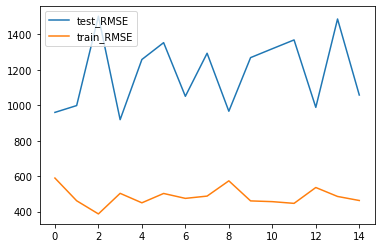

In [219]:
plt.plot(-cv_scores['test_neg_root_mean_squared_error'])
plt.plot(-cv_scores['train_neg_root_mean_squared_error'])
plt.legend(labels=['test_RMSE', 'train_RMSE'])

The graph shows that the train error is always smaller than the validation error. This means that there is an overfitting problem.

In [220]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipeTrigo,
                X         = X_train,
                y         = y_train_trigo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")


Média métricas de validación cruzada: -929.0517769738875


The average root_mean_squared_error estimated by cross-validation for the ridge model is 929. This value will be checked later when the error of the model is calculated with the test set.

The same process is then carried out for the other three crops.

# CREATING THE MODEL (POTATO)

In [221]:
m_ridge_1 = Ridge()
m_ridge_1.fit(X_train_prep, y_train_patata)
pipePotato = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])


pipePotato.fit(X=X_train, y=y_train_patata)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['Año', 'Precipitacion_Enero',
                                                   'Precipitacion_Febrero',
                                                   'Precipitacion_Marzo',
                                                   'Precipitacion_Abril',
                                                   'Precipitacion_Mayo',
                                                   'Precipitacion_Junio',
                                                   'Precipitacion_Julio',
                                                   'Precipitacion_Agosto',
                                                   'Precipitacion_Septiembre',
                                                   'Precipitacion_Octubre',
                                                   'Precipitacion_Noviemb

# VALIDATION POTATO

In [222]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = pipePotato,
                X         = X_train,
                y         = y_train_patata,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-14161.91155075 -10163.27467681  -6117.07898817  -9713.30722273
  -5781.48019381]
Media métricas de validación cruzada: -9187.410526451964


In [223]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipePotato,
                X         = X_train,
                y         = y_train_patata,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")

Métricas de validación cruzada: [-10821.11492248  -9509.75450432 -10846.74232477  -9354.34078072
  -8265.49694182  -9229.71676809  -9669.83539238  -7215.12325212
 -11092.86333935 -10016.96828236  -5632.89384319  -8859.58413124
 -15542.44063231 -11208.36344778 -11757.04402689  -9382.97279651
 -10030.90004953  -6139.26795861 -10386.64289697  -9625.21649028
  -9700.13908206 -15960.57525116  -8829.13410527  -9874.77999008
  -3581.20667326]

Media métricas de validación cruzada: -9701.324715341381


In [224]:
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipePotato,
                X         = X_train,
                y         = y_train_patata,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.017996,0.008995,-1.038415,0.853871,-10895.998424,-4127.886226
1,0.011997,0.007997,-0.251831,0.769374,-12379.074682,-4345.544110
2,0.012997,0.011994,0.242046,0.798637,-8745.765279,-4276.572797
3,0.012996,0.008997,0.303840,0.810823,-8249.184362,-4247.219869
4,0.043986,0.005998,0.226648,0.789835,-7721.413139,-4713.646483
5,0.010995,0.005997,-0.214529,0.799574,-11209.461411,-4185.868291
6,0.008948,0.006000,0.147659,0.745432,-7918.307015,-5163.419412
7,0.009991,0.007995,-0.539095,0.908236,-13418.573871,-2746.457479
8,0.012995,0.008996,-0.837700,0.851973,-12744.252676,-3880.415573
9,0.014997,0.005997,0.047645,0.808935,-8717.342227,-4390.127660


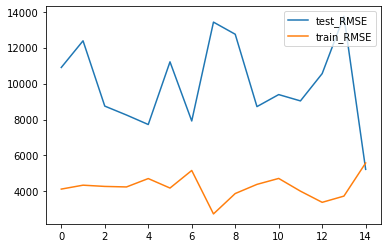

In [225]:
plt.plot(-cv_scores['test_neg_root_mean_squared_error'])
plt.plot(-cv_scores['train_neg_root_mean_squared_error'])
plt.legend(labels=['test_RMSE', 'train_RMSE'])

Unlike in the case of wheat, it can be observed that there is considerably less difference between the training error and the validation error, even crossing at some points. This means that the overfitting is less pronounced.

In [226]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipePotato,
                X         = X_train,
                y         = y_train_patata,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -8811.62175833234


# CREATING THE MODEL (CORN)

In [227]:
m_ridge_1 = Ridge()
m_ridge_1.fit(X_train_prep, y_train_maiz)
pipeCorn = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])


pipeCorn.fit(X=X_train, y=y_train_maiz)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['Año', 'Precipitacion_Enero',
                                                   'Precipitacion_Febrero',
                                                   'Precipitacion_Marzo',
                                                   'Precipitacion_Abril',
                                                   'Precipitacion_Mayo',
                                                   'Precipitacion_Junio',
                                                   'Precipitacion_Julio',
                                                   'Precipitacion_Agosto',
                                                   'Precipitacion_Septiembre',
                                                   'Precipitacion_Octubre',
                                                   'Precipitacion_Noviemb

# VALIDATION CORN

In [228]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = pipeCorn,
                X         = X_train,
                y         = y_train_maiz,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [ -859.32659762 -2190.67455638 -2350.47475967 -1335.49074953
 -2206.69789086]
Media métricas de validación cruzada: -1788.532910812414


In [229]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipeCorn,
                X         = X_train,
                y         = y_train_maiz,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")

Métricas de validación cruzada: [-1970.16964743 -1877.80775693 -2492.79348238 -1828.74346507
 -2098.10739358 -1456.68803859 -1607.67686503 -1909.13483173
 -1798.73755715 -2117.9809437  -2483.5216772  -1683.61278131
 -2099.93109531 -2096.91929018 -1876.23403293 -1409.3082382
 -1895.38112907 -1625.96394004 -2599.05186963 -2327.06324956
 -2198.78587569 -2290.27577296 -1839.68829706 -1342.10549171
 -1709.16269227]

Media métricas de validación cruzada: -1945.3938165890688


In [230]:
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipeCorn,
                X         = X_train,
                y         = y_train_maiz,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.013998,0.009011,0.540484,0.892948,-2000.140047,-1029.217646
1,0.013995,0.007998,0.133218,0.888162,-3251.097513,-956.496471
2,0.015995,0.008998,0.299742,0.936732,-2278.184995,-813.193740
3,0.010995,0.006000,0.665263,0.877845,-1580.119295,-1133.046043
4,0.009998,0.004997,0.546080,0.902819,-1887.516642,-1000.986894
5,0.008994,0.005999,0.692325,0.890387,-2009.464200,-920.951595
6,0.016994,0.005999,0.100564,0.900795,-2979.725081,-902.038696
7,0.009009,0.005985,0.529198,0.922203,-2046.993920,-863.329709
8,0.008998,0.005995,0.228915,0.904415,-2405.248281,-989.132301
9,0.010010,0.011983,0.777229,0.861521,-1419.167772,-1158.058444


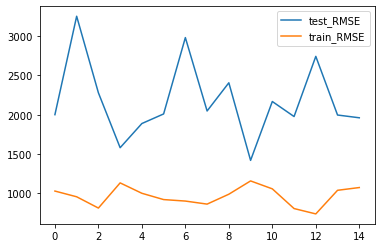

In [231]:
plt.plot(-cv_scores['test_neg_root_mean_squared_error'])
plt.plot(-cv_scores['train_neg_root_mean_squared_error'])
plt.legend(labels=['test_RMSE', 'train_RMSE'])

This graph has a similar behaviour as in the case of wheat, i.e. a clear problem of overfitting is observed.

In [232]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipeCorn,
                X         = X_train,
                y         = y_train_maiz,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -1779.6860613346084


# CREATING THE MODEL (CHICKPEA)

In [233]:
m_ridge_1 = Ridge()
m_ridge_1.fit(X_train_prep, y_train_garbanzo)
pipeChickpea = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])


pipeChickpea.fit(X=X_train, y=y_train_garbanzo)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['Año', 'Precipitacion_Enero',
                                                   'Precipitacion_Febrero',
                                                   'Precipitacion_Marzo',
                                                   'Precipitacion_Abril',
                                                   'Precipitacion_Mayo',
                                                   'Precipitacion_Junio',
                                                   'Precipitacion_Julio',
                                                   'Precipitacion_Agosto',
                                                   'Precipitacion_Septiembre',
                                                   'Precipitacion_Octubre',
                                                   'Precipitacion_Noviemb

# VALIDATION CHICKPEA

In [234]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = pipeChickpea,
                X         = X_train,
                y         = y_train_garbanzo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-270.85765765 -192.17025478 -236.22999561 -358.12182208 -242.16652485]
Media métricas de validación cruzada: -259.9092509955389


In [235]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipeChickpea,
                X         = X_train,
                y         = y_train_garbanzo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")

Métricas de validación cruzada: [-262.69492604 -165.95955837 -296.10180175 -317.63218552 -195.87594471
 -254.92301639 -345.83351623 -215.61456878 -275.75713555 -314.89925115
 -240.84447445 -272.5206569  -262.22569115 -214.6676377  -161.40710055
 -269.84873035 -194.87332096 -280.76793069 -236.4207745  -299.9470781
 -259.55150499 -276.15776015 -327.75055538 -263.84102745 -180.86319355]

Media métricas de validación cruzada: -255.47917365460074


In [236]:
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipeChickpea,
                X         = X_train,
                y         = y_train_garbanzo,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.013996,0.008996,-0.520695,0.842498,-244.980900,-135.492572
1,0.009997,0.005998,0.221112,0.813974,-308.442249,-119.059158
2,0.010996,0.017994,0.177230,0.810919,-302.058266,-124.106985
3,0.022994,0.008996,-0.474719,0.885915,-307.392295,-107.353539
4,0.011996,0.013995,0.436662,0.780346,-207.334006,-147.625382
5,0.018994,0.009996,-0.646229,0.842644,-447.978076,-106.017221
6,0.015995,0.009997,0.401316,0.762505,-210.172835,-151.193075
7,0.013997,0.006997,0.259451,0.791119,-311.899476,-114.821278
8,0.015997,0.007995,-0.149913,0.826232,-243.361348,-138.811198
9,0.009995,0.006997,0.018514,0.780232,-330.763270,-131.013104


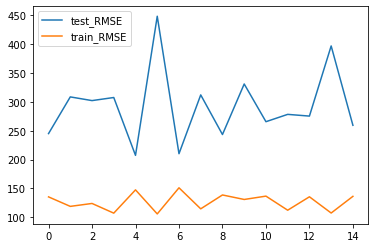

In [237]:
plt.plot(-cv_scores['test_neg_root_mean_squared_error'])
plt.plot(-cv_scores['train_neg_root_mean_squared_error'])
plt.legend(labels=['test_RMSE', 'train_RMSE'])

The same conclusions can be drawn as for wheat and corn.

In [238]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipeChickpea,
                X         = X_train,
                y         = y_train_garbanzo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -242.32348076539844


Next, to compare the results, the same process will be carried out but with the Random Forest Regressor.

# CREATION AND VALIDATION (WHEAT) RANDOM FOREST REGRESSOR

Métricas validación cruzada: [ -822.35956038  -809.29068427 -1020.00008923  -874.62950581
 -1193.31022916]
Media métricas de validación cruzada: -943.9180137691346
Métricas de validación cruzada: [ -888.44583942  -811.97577243 -1094.31224227  -829.49219743
 -1154.06924609 -1038.09690998  -954.38748506  -850.71134746
  -920.63133246  -754.86372974 -1149.72071904  -649.95065076
  -730.13474525  -943.08360716 -1101.5049985   -838.82098232
  -862.7182063   -826.54412126  -780.66647821 -1113.31923328
 -1008.35976051  -845.09342671 -1078.58813012 -1055.34060573
  -465.39980498]

Media métricas de validación cruzada: -909.8492628985612


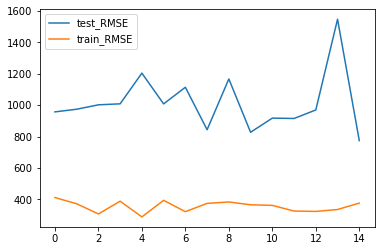

In [239]:
from sklearn.ensemble import RandomForestRegressor
pipeWheat = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])

pipeWheat.fit(X=X_train, y=y_train_trigo)

cv_scores = cross_val_score(
                estimator = pipeWheat,
                X         = X_train,
                y         = y_train_trigo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")

from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipeWheat,
                X         = X_train,
                y         = y_train_trigo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")

from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipeWheat,
                X         = X_train,
                y         = y_train_trigo,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores


plt.plot(-cv_scores['test_neg_root_mean_squared_error'])
plt.plot(-cv_scores['train_neg_root_mean_squared_error'])
plt.legend(labels=['test_RMSE', 'train_RMSE'])

In [240]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipeWheat,
                X         = X_train,
                y         = y_train_trigo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -882.5208394564689


The average root_mean_squared_error estimated for the Random Forest Regressor is lower than the value of the Ridge regularization technique (872<929). However, we continue having an overfitting problem.
 
We will do the same with the other three crops. 

# CREATION AND VALIDATION (POTATO) RANDOM FOREST REGRESSOR

Métricas validación cruzada: [ -8145.91585798 -10576.19450857  -6090.49362802  -8133.62885383
  -8503.30026755]
Media métricas de validación cruzada: -8289.906623188868
Métricas de validación cruzada: [ -7830.9739349   -8682.75395468 -11058.4744468   -9401.10565704
  -7362.8357618  -10217.74289046  -7207.67405749  -7613.45718787
  -8476.34059162  -8635.51043448  -8339.04156457 -11383.74549673
 -10198.67811881  -9850.37718157  -5987.44975013  -8916.55652089
 -10744.73113013  -7831.7293713   -8250.42490363  -9585.27644634
  -8505.72314122 -10241.53127281  -8699.18491306  -8661.93820278
  -6006.9713935 ]

Media métricas de validación cruzada: -8787.60913298409


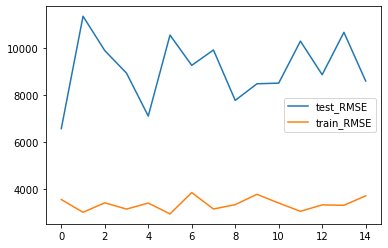

In [241]:
pipePotato = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])

pipePotato.fit(X=X_train, y=y_train_patata)

cv_scores = cross_val_score(
                estimator = pipePotato,
                X         = X_train,
                y         = y_train_patata,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")


cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipePotato,
                X         = X_train,
                y         = y_train_patata,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")


cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipePotato,
                X         = X_train,
                y         = y_train_patata,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores


plt.plot(-cv_scores['test_neg_root_mean_squared_error'])
plt.plot(-cv_scores['train_neg_root_mean_squared_error'])
plt.legend(labels=['test_RMSE', 'train_RMSE'])

In [242]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipePotato,
                X         = X_train,
                y         = y_train_patata,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -8173.021433956315


As well as in the case of wheat, the average root_mean_squared_error estimated is lower with the Random Forest Regressor (8137,55<8811).

However, in contrast to the Ridge, the difference between the training error and the validation error is larger.

# CREATION AND VALIDATION (CORN) RANDOM FOREST REGRESSOR

Métricas validación cruzada: [-1745.70338724 -1844.22937833 -2208.44917091 -1208.28076571
 -2610.71233248]
Media métricas de validación cruzada: -1923.475006933717
Métricas de validación cruzada: [-2371.09137898 -2244.66582625 -2258.04904079 -2130.25876699
 -1723.11377506 -1606.93857659 -1767.90396403 -1986.53114427
 -1511.91210151 -2379.95960218 -2253.82962047 -1602.6100875
 -1861.16312521 -2488.45654182 -1740.88955057 -1529.73303458
 -2425.86751495 -1275.64536935 -2510.81783189 -2415.18203112
 -2391.55200314 -2043.19556656 -1531.06123321 -1681.35818148
 -1772.88725488]

Media métricas de validación cruzada: -1980.1869249352924


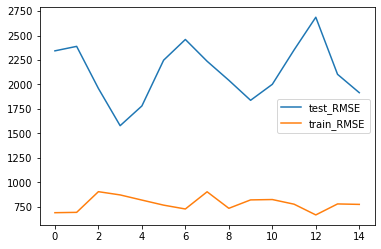

In [243]:
pipeCorn = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])

pipeCorn.fit(X=X_train, y=y_train_maiz)

cv_scores = cross_val_score(
                estimator = pipeCorn,
                X         = X_train,
                y         = y_train_maiz,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")


cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipeCorn,
                X         = X_train,
                y         = y_train_maiz,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")


cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipeCorn,
                X         = X_train,
                y         = y_train_maiz,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores


plt.plot(-cv_scores['test_neg_root_mean_squared_error'])
plt.plot(-cv_scores['train_neg_root_mean_squared_error'])
plt.legend(labels=['test_RMSE', 'train_RMSE'])

In [244]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipeCorn,
                X         = X_train,
                y         = y_train_maiz,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -1793.1902274386364


In the case of corn, the value is a little bit bigger in the case of Random Forest Regressor (1834,85>1779).

# CREATION AND VALIDATION (CHICKPEA) RANDOM FOREST REGRESSOR

Métricas validación cruzada: [-257.36594396 -284.88961399 -197.97708761 -344.72975065 -195.24912425]
Media métricas de validación cruzada: -256.04230409131003
Métricas de validación cruzada: [-253.35314527 -217.7376864  -221.8591509  -299.5838355  -247.63293273
 -226.87242979 -243.335047   -232.60724157 -230.3690097  -319.12374498
 -223.75203755 -228.82954864 -316.85388274 -195.52598837 -198.49815259
 -284.81744919 -203.7702227  -293.57612968 -231.7849277  -257.1992305
 -264.27878037 -252.23041018 -375.42446931 -237.98659036 -209.84072932]

Media métricas de validación cruzada: -250.67371092226114


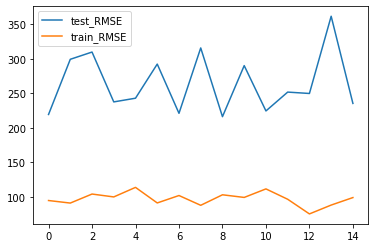

In [245]:
pipeChickpea = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])

pipeChickpea.fit(X=X_train, y=y_train_garbanzo)

cv_scores = cross_val_score(
                estimator = pipeChickpea,
                X         = X_train,
                y         = y_train_garbanzo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")


cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipeChickpea,
                X         = X_train,
                y         = y_train_garbanzo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")


cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipeChickpea,
                X         = X_train,
                y         = y_train_garbanzo,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores


plt.plot(-cv_scores['test_neg_root_mean_squared_error'])
plt.plot(-cv_scores['train_neg_root_mean_squared_error'])
plt.legend(labels=['test_RMSE', 'train_RMSE'])

In [246]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipeChickpea,
                X         = X_train,
                y         = y_train_garbanzo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -235.325724848727


In this final case, the value decreases a little bit (235<242).

In conclusion, it can be said that the average root_mean_squared_error estimated is lower with the Random Forest Regressor than with the Ridge. However, an overfitting problem is still observed.

Once the process of training has been completed, the prediction of the different crops will be carried out and the test error will be calculated.

# PREDICTION AND TEST ERROR (WHEAT)

In [247]:
prediccionesTrigo = pipeTrigo.predict(X_test)

In [248]:
df_prediccionesTrigo = pd.DataFrame({'RendimientoTrigo' : y_test_trigo, 'prediccion' : prediccionesTrigo})
df_prediccionesTrigo.head()

,RendimientoTrigo,prediccion
22,4919.0,4214.199110
32,2267.0,2833.785253
33,1996.0,3692.686463
8,3698.0,4367.904161
6,4187.0,3960.352210


In [249]:
# TEST ERROR

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test_trigo,
        y_pred = prediccionesTrigo,
        squared = False
       )
rmse

677.0276609090171

In the validation section (Random Forest Regressor), it was estimated, by repeated cross-validation, that the rmse of the model was 872. However, in the test the value decreases to 677,02. 

So, this is a good notice. Let's see if it happens the same with the other crops.

# PREDICTION AND TEST ERROR (POTATO)

In [250]:
prediccionesPatata = pipePotato.predict(X_test)

In [251]:
df_prediccionesPatata = pd.DataFrame({'RendimientoPatata' : y_test_patata, 'prediccion' : prediccionesPatata})
df_prediccionesPatata.head()

,RendimientoPatata,prediccion
22,20316.0,26725.19
32,36539.0,32586.81
33,31130.0,38243.43
8,31532.0,36394.55
6,17962.0,28952.68


In [252]:
# TEST ERROR

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test_patata,
        y_pred = prediccionesPatata,
        squared = False
       )
rmse

8018.67116507851

In the validation section (Random Forest Regressor), it was estimated, by repeated cross-validation, that the rmse of the model was 8137. The test error decreases to 7862,65. 

# PREDICTION AND TEST ERROR (CORN)

In [253]:
prediccionesMaiz = pipeCorn.predict(X_test)

In [254]:
df_prediccionesMaiz = pd.DataFrame({'RendimientoMaiz' : y_test_maiz, 'prediccion' : prediccionesMaiz})
df_prediccionesMaiz.head()

,RendimientoMaiz,prediccion
22,8699.0,7936.26
32,11685.0,11343.26
33,11475.0,10866.86
8,7530.0,11162.02
6,7589.0,8010.99


In [255]:
# TEST ERROR

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test_maiz,
        y_pred = prediccionesMaiz,
        squared = False
       )
rmse

1294.9035383883888

In the validation section (Random Forest Regressor), it was estimated, by repeated cross-validation, that the rmse of the model was 1834,85. The test error decreases to 1287,99. 

# PREDICTION AND TEST ERROR (CHICKPEA)

In [256]:
prediccionesGarbanzo = pipeChickpea.predict(X_test)

In [257]:
df_prediccionesGarbanzo = pd.DataFrame({'RendimientoGarbanzo' : y_test_garbanzo, 'prediccion' : prediccionesGarbanzo})
df_prediccionesGarbanzo.head()

,RendimientoGarbanzo,prediccion
22,1035.0,1018.84
32,414.0,918.33
33,532.0,1012.54
8,1011.0,933.33
6,1611.0,1135.49


In [258]:
# TEST ERROR

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test_garbanzo,
        y_pred = prediccionesGarbanzo,
        squared = False
       )
rmse

347.5433120213497

In the validation section (Random Forest Regressor), it was estimated, by repeated cross-validation, that the rmse of the model was 234,35. The test error increases to 347,83. 

As a final conclusion, it can be said that the model is quite effective in predicting new variables. 